# Environment

In [ ]:
import numpy as np
from itertools import combinations

class LinBandit_env(object):
  
  # Global init
  num_dims = 0
  num_arms = 0
  sigma = 0.1

  #sigma = 0.0 # No noise for Active

  num_trials = 20
  T = 1000
  delta = 0.1

  def LinBandit_env1(self, seed, num_dims, num_arms):
          
    np.random.seed(seed)
    self.num_dims = num_dims
    self.num_arms = num_arms
          
    arm_index = [i for i in range(self.num_arms)]
          
    
        
    self.X = []

    self.X.append([1.0, 0.0])
    self.X.append([0.0, 1.0])
    self.X.append([0.45, 0.45])

    # self.X.append([1.0, 0.0, 0.0])
    # self.X.append([0.0, 1.0, 0.0])
    # self.X.append([0.45, 0.45, 0.45])

    epsilon = np.random.uniform(0, 0.1, size = self.num_arms)
    for i in range(3, self.num_arms):
      sign_a = np.random.randint(-1,2)
      # self.X.append([0.45 + epsilon[i], 0.45 - epsilon[i]])
      self.X.append([0.45 + sign_a*epsilon[i], 0.45 - sign_a*epsilon[i]])
      # self.X.append([0.45 + epsilon[i], 0.45 - epsilon[i], 0.45 -  epsilon[i]/2.0])

    self.X = np.array(self.X)
    

    #print(self.X)

    for i in range(0, self.num_arms):
          
      tmp = self.X[i]
      norm = np.linalg.norm(tmp)
      tmp = tmp/norm
      self.X[i] = tmp

    print(self.X)
    
          
    best_X = self.X[0]
    second_best_X = self.X[2]
          
    self.theta_star = best_X + 0.01*(best_X - second_best_X)
    print("theta_star: ", self.theta_star)
          
    print("means:" + str(self.X.dot(self.theta_star)))
          
    self.best_arm = np.argmax(self.X@self.theta_star)
    self.best_arm_set = [self.best_arm]
          
    #print(self.best_arm)
          
    Y2 = self.X@self.theta_star
    #print(Y2)
          
    Y2 = np.sort(Y2)
    #print(Y2)
          
    self.epsilon = (Y2[len(Y2)-1] - Y2[len(Y2)-2])*0.5
    #print(self.epsilon)
          
    self.min_seperation = np.linalg.norm(best_X - second_best_X)
    #print("best X" + str(best_X))
    #print("second_best X" + str(second_best_X))
    # for i in range(0,len(self.X)):
    #     print(','.join([str(self.X[i][j]) for j in range(len(self.X[0]))]))
    #     print()
    #           #for j in range(0,len(self.X[0])):
    #           #    print(self.X[i][j], sep=", ")
          
          
    # print("min_seperation " + str(self.min_seperation))
    # print(self.theta_star)
    # print(self.num_dims*(3*self.num_dims),self.num_dims*(12.0/self.min_seperation),self.num_dims*((12.0*self.num_dims)/self.min_seperation))
    # print(np.log(self.num_dims*(3*self.num_dims)),np.log(self.num_dims*(12.0/self.min_seperation)),np.log(self.num_dims*((12.0*self.num_dims)/self.min_seperation)))
    t = 1
    #print("threshold:", str(np.log(4 * (t+1)**2/self.delta)+ self.num_dims * np.log(12.0/self.min_seperation)))
    return self

  def LinBandit_env2(self, seed, num_dims, num_arms):
          
    np.random.seed(seed)
    self.num_dims = num_dims
    self.num_arms = num_arms
          
    arm_index = [i for i in range(self.num_arms)]
          
    arm_index_comb = list(combinations(arm_index, 2))
        
    self.X = []

    #print(X)
    for i in range(0, self.num_arms):
          
      tmp = np.random.randn(self.num_dims)
      norm = np.linalg.norm(tmp)
      tmp = tmp/norm
      #X = np.r_[X,np.expand_dims(tmp,0)]
      self.X.append(tmp)
            
    self.X = np.array(self.X)
          
    arm_diff = []
    for a in arm_index_comb:
      #print(a)
      arm_diff.append(np.linalg.norm(self.X[a[0]] - self.X[a[1]]))
          
      #print(arm_diff, np.argmin(arm_diff))
          
          
    min_arm_index = np.argmin(arm_diff)
    #print(min_arm_index, arm_index_comb[min_arm_index])
          
    best_X = self.X[arm_index_comb[min_arm_index][0]]
    second_best_X = self.X[arm_index_comb[min_arm_index][1]]
          
    self.theta_star = best_X + 0.01*(best_X - second_best_X)
    #print("theta_star: ", self.theta_star)
          
    #print("means:" + str(self.X.dot(self.theta_star)))
          
    self.best_arm = np.argmax(self.X@self.theta_star)
    self.best_arm_set = [self.best_arm]
          
    #print(self.best_arm)
          
    Y2 = self.X@self.theta_star
    #print(Y2)
          
    Y2 = np.sort(Y2)
    #print(Y2)
          
    self.epsilon = (Y2[len(Y2)-1] - Y2[len(Y2)-2])*0.5
    #print(self.epsilon)
          
    self.min_seperation = np.linalg.norm(best_X - second_best_X)
    #print("best X" + str(best_X))
    #print("second_best X" + str(second_best_X))
    # for i in range(0,len(self.X)):
    #     print(','.join([str(self.X[i][j]) for j in range(len(self.X[0]))]))
    #     print()
    #           #for j in range(0,len(self.X[0])):
    #           #    print(self.X[i][j], sep=", ")
          
          
    # print("min_seperation " + str(self.min_seperation))
    # print(self.theta_star)
    # print(self.num_dims*(3*self.num_dims),self.num_dims*(12.0/self.min_seperation),self.num_dims*((12.0*self.num_dims)/self.min_seperation))
    # print(np.log(self.num_dims*(3*self.num_dims)),np.log(self.num_dims*(12.0/self.min_seperation)),np.log(self.num_dims*((12.0*self.num_dims)/self.min_seperation)))
    t = 1
    #print("threshold:", str(np.log(4 * (t+1)**2/self.delta)+ self.num_dims * np.log(12.0/self.min_seperation)))
    return self


#if __name__ == "__main__":
env = LinBandit_env()
#seed 1 for dim 2, 10 arms
#obj.LinBandit_env2(55, 2, 12)
# obj.LinBandit_env2(16, 8, 12)
# env.LinBandit_env1(16, 3, 50)
env.LinBandit_env1(16, 2, 50)
# obj.LinBandit_env1(16, 3, 50)

[[1.         0.        ]
 [0.         1.        ]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.64834394 0.76134758]
 [0.7412503  0.67122871]
 [0.80594492 0.59199053]
 [0.6809283  0.73235009]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.78951088 0.61373656]
 [0.70710678 0.70710678]
 [0.58604636 0.81027752]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.751627   0.65958839]
 [0.70710678 0.70710678]
 [0.77594022 0.63080645]
 [0.6725454  0.74005586]
 [0.77351489 0.63377812]
 [0.72583922 0.68786439]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.75469446 0.65607642]
 [0.70028379 0.71386456]
 [0.81404059 0.58080799]
 [0.61725833 0.78676055]
 [0.81588688 0.57821155]
 [0.70710678 0.70710678]
 [0.71836277 0.6956687 ]
 [0.70710678 0.70710678]
 [0.69868259 0.71543178]
 [0.80546877 0.59263822]
 [0.63436953 0.77302995]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70890822 0.70530075]


## Plot Environment

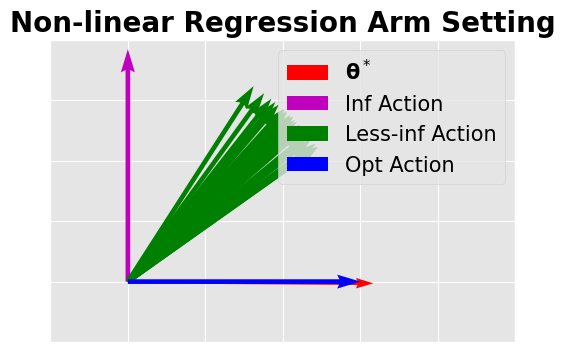

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(dpi=100)

V = np.copy(np.array(env.X))
origin = [0], [0] # origin point

#print(V)

b = 2


plt.quiver(*origin, *env.theta_star, color=['r'], scale=0.95*b, label = "$\mathbf{\\theta}^*$")


#plt.quiver(*origin, V[0,0], V[0,1], color=['g'], linewidth = 3, scale=4, label = "Optimal Arm [1,0]")

plt.quiver(*origin, *V[1,:], color=['m'], scale=b, width = 0.01, label = "Inf Action")
for i in range(2,len(V)-1):
  plt.quiver(*origin, *V[i,:], color=['g'], scale=b, width = 0.01)

plt.quiver(*origin, *V[len(V)-1,:], color=['g'], scale=b, width = 0.01, label = "Less-inf Action") # To show only one legend of non-inf arm
plt.quiver(*origin, *V[0,:], color=['b'], scale=b, width = 0.01, label = "Opt Action")

# plt.xlim(-0.01,0.02)
# plt.ylim(-0.02,0.03)

plt.title('Non-linear Regression Arm Setting', size = 20, fontweight='bold')

plt.xlim(-0.02, 0.1)
plt.ylim(-0.02, 0.08)

legend_properties = {'weight':'bold'}
leg = plt.legend(fontsize = 15)

# plt.xticks(size = 0)
# plt.yticks(size = 0)

plt.tick_params(
    which='both',     
    bottom=False,      
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False)

plt.xticks(size = 20, fontweight='bold')
plt.yticks(size = 20, fontweight='bold')


plt.xticks(size = 15)
plt.yticks(size = 15)

plt.show()

# GLM Chernoff (Don't run)

In [ ]:
# # import sys
# # sys.path.append("..")

# import numpy as np
# import cvxpy as cp
# from scipy.optimize import least_squares

# #from environment.LinBandit_env import LinBandit_env

# class GLM_MaxMin_Sampling(object):
    
#     def __init__(self, env):
#         '''
#         Constructor
#         '''
#         self.T = env.T
#         self.num_trials = env.num_trials
#         self.num_dims = env.num_dims
#         self.num_arms = env.num_arms
#         self.rec = 1 # record err every rec samples
#         self.mm_sample_complexity = []
#         self.sigma = env.sigma
#         self.theta_star = env.theta_star
#         self.best_arm = env.best_arm
#         self.X = env.X
#         self.delta = env.delta
#         self.seed = None
#         self.env = env
        
#         self.mm_esterr = np.zeros((self.num_trials, self.T//self.rec))
#         self.mm_armerr = np.zeros((self.num_trials, self.T//self.rec))
#         self.mm_T = self.T * np.ones(self.num_trials)
        
#         self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)
        
    
#     def init_GLM_MaxMin_Sampling(self, env):   
        
#         self.theta_star = env.theta_star
#         self.best_arm = env.best_arm
#         self.X = env.X
#         self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)
        
#         #print(delta)
        
#     def max_kmin_eig(self, rows_of_arms, k=1, verbose=False):
        
#         p = cp.Variable(rows_of_arms.shape[0], nonneg=True)
        
#         prob = cp.Problem(
#             cp.Maximize(cp.lambda_sum_smallest(rows_of_arms.T @ cp.diag(p) @ rows_of_arms, k)),
#             [cp.sum(p) ==1]
#         )
        
#         try:
#             obj_value = prob.solve(solver='CVXOPT', kktsolver=cp.ROBUST_KKTSOLVER, verbose=verbose)
#         except Exception as inst:
#             print(inst)
#             return False
        
#         return p.value, prob.value
    
#     def reward_func(self, theta, X):
#       '''
#       exact function at any input theta and x coordinate
#       '''
#       #print(x_coord)
#       #print(theta, X)
#       # print(np.transpose(theta, x))
#       mu_list = []
#       for x in X:
#         mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
      
#       return np.array(mu_list)
#       #return 1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x[0]))))
#       #return np.array([0, 1, 0])

#     def residuals(self, theta):
#       '''
#       function to be optimized
#       '''
#       # y = self.env.x - theta
#       # funcvals_at_theta = np.exp(-1.0*y**2)*np.cos(4.0*np.pi*y)
#       # mus_inds_pulled = funcvals_at_theta[self.inds_pulled]
#       #print(theta)


#       X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
#       mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

#       return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

#     def find_least_square(self, theta_hat_1 = 0.0):
#       '''
#       finds theta_hat by optimizing L_{Y^t}(theta)
#       '''

#       #rand_start = np.random.uniform(0,1)
#       #rand_start = 0.7
#       #rand_start = np.array([0.6, 0.6, 0.6])
#       rand_start = np.array([0.6, 0.6])
#       #rand_start = theta_hat_1 = 0.0

#       self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
#       #print("opt sol: ", self.opt_soln)

#       return self.opt_soln
    

    
#     def run_GLM_MaxMin_Sampling(self):

#         self.error = np.zeros((self.num_trials, self.T))  

#         for tr in range(self.num_trials):

#             self.seed = tr 
#             np.random.seed(tr)
#             print(tr, end=' ')
            
            
#             '''
#             env = self.env.LinBandit_env1(tr, self.num_dims, self.num_arms)
#             self.init_MaxMin_Sampling(env)
#             '''
#             maxmin_A = np.eye(self.num_dims)
#             maxmin_b = np.zeros(self.num_dims)
#             #print(p_mm,v, num_arms, num_samples)
#             np.random.seed(tr)
#             # maxmin_samples = np.random.choice(self.num_arms, size=self.T, p=self.p_mm/np.sum(self.p_mm))
#             # maxmin_R = self.X[maxmin_samples] @ self.theta_star + self.sigma * np.random.randn(len(maxmin_samples))

#             maxmin_samples = []
#             maxmin_R = []
           
#             maxmin_rewards = np.zeros((2, self.num_arms))
#             maxmin_err = np.zeros((2, self.T//self.rec))

#             self.p_mm = [1.0/self.num_arms for i in range(0,self.num_arms)]
#             self.inds_pulled = []
#             self.rewards = []

#             self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)

#             for s in range(self.T):
                
#                 arm = np.random.choice(self.num_arms, size = 1, p = self.p_mm)
#                 # print(arm)
#                 reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()

#                 self.inds_pulled.append(arm[0])
#                 self.rewards.append(reward[0])
#                 # print(arm, reward)
#                 maxmin_samples.append(arm[0])
#                 maxmin_R.append(reward[0])

#                 maxmin_rewards[0, maxmin_samples[s]] += maxmin_R[s]
#                 maxmin_rewards[1, maxmin_samples[s]] += 1
#                 maxmin_A += np.outer(self.X[maxmin_samples[s]], self.X[maxmin_samples[s]])
#                 maxmin_b += maxmin_R[s] * self.X[maxmin_samples[s]]
        
                
#                 # theta_hat = least_sq_theta(maxmin_rewards, X)[0]
#                 #theta_hat = np.linalg.solve(maxmin_A, maxmin_b)

#                 if s%3 == 0:
#                   theta_hat = self.find_least_square()["x"]

#                 # theta_hat = theta_hat / np.linalg.norm(theta_hat) #Normalize theta hat
#                 # self.X_proj = np.array([x - np.dot(x, theta_hat) * theta_hat for x in self.X])
#                 # self.X_proj = self.X_proj/np.linalg.norm(self.X_proj)
#                 # self.p_mm, self.v = self.max_kmin_eig(self.X_proj, verbose=False)

                

#                 maxmin_err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
#                 #maxmin_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
#                 self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                    
#                 if s%100 == 0 and s >= 100:
#                   print(s, theta_hat, self.theta_star, maxmin_err[0][s])

#                 if s%1000 == 0:
#                     print(s)
                    
#             self.mm_esterr[tr] = maxmin_err[0]
#             self.mm_armerr[tr] = maxmin_err[1]
#             self.mm_sample_complexity.append(maxmin_samples)



# if __name__ == "__main__":
    
#     env = LinBandit_env()
#     #env.LinBandit_env2(874, 8, 12)
#     #env.LinBandit_env1(16, 3, 50)
#     env.LinBandit_env1(16, 2, 50)
    
#     glm_gen_chern = GLM_MaxMin_Sampling(env)
#     print(glm_gen_chern.p_mm)
#     glm_gen_chern.run_GLM_MaxMin_Sampling()




[[1.         0.        ]
 [0.         1.        ]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.64834394 0.76134758]
 [0.7412503  0.67122871]
 [0.80594492 0.59199053]
 [0.6809283  0.73235009]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.78951088 0.61373656]
 [0.70710678 0.70710678]
 [0.58604636 0.81027752]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.751627   0.65958839]
 [0.70710678 0.70710678]
 [0.77594022 0.63080645]
 [0.6725454  0.74005586]
 [0.77351489 0.63377812]
 [0.72583922 0.68786439]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.75469446 0.65607642]
 [0.70028379 0.71386456]
 [0.81404059 0.58080799]
 [0.61725833 0.78676055]
 [0.81588688 0.57821155]
 [0.70710678 0.70710678]
 [0.71836277 0.6956687 ]
 [0.70710678 0.70710678]
 [0.69868259 0.71543178]
 [0.80546877 0.59263822]
 [0.63436953 0.77302995]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70890822 0.70530075]


# GLM Chernoff Exlploration (Don't run)

In [ ]:
# # import sys
# # sys.path.append("..")

# import numpy as np
# import cvxpy as cp
# from scipy.optimize import least_squares
# import pickle

# #from environment.LinBandit_env import LinBandit_env

# class Chern_Sampling_Exploration(object):
    
#     def __init__(self, env):
#         '''
#         Constructor
#         '''
#         self.T = env.T
#         self.num_trials = env.num_trials
#         self.num_dims = env.num_dims
#         self.num_arms = env.num_arms
#         self.rec = 1 # record err every rec samples
#         self.sample_complexity = []
#         self.sigma = env.sigma
        
#         self.theta_star = env.theta_star
#         self.X = env.X
#         self.delta = env.delta
#         self.seed = None
#         self.env = env
        
#         self.esterr = np.zeros((self.num_trials, self.T//self.rec))
#         self.armerr = np.zeros((self.num_trials, self.T//self.rec))
#         self.epsilon = 0
#         # self.mm_T = self.T * np.ones(self.num_trials)
        
#         # self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)
#         # self.p_mm = [1.0/self.num_arms for i in range(self.num_arms)]
        
    
#     def prop_load(self, ):
#       file = open('chern_lin_prop1', 'rb')
#       # dump information to that file
#       self.p_mm = pickle.load(file)
#       # close the file
#       file.close()
#       return self.p_mm
        
#     def max_kmin_eig(self, rows_of_arms, k=1, verbose=False):
        
#         p = cp.Variable(rows_of_arms.shape[0], nonneg=True)
        
#         prob = cp.Problem(
#             cp.Maximize(cp.lambda_sum_smallest(rows_of_arms.T @ cp.diag(p) @ rows_of_arms, k)),
#             [cp.sum(p) ==1]
#         )
        
#         try:
#             obj_value = prob.solve(solver='CVXOPT', kktsolver=cp.ROBUST_KKTSOLVER, verbose=verbose)
#         except Exception as inst:
#             print(inst)
#             return False
        
#         return p.value, prob.value
    
    
      

#     def residuals(self, theta):
#       '''
#       function to be optimized
#       '''
      

#       X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
#       mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

#       return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

#     def find_least_square(self, theta_hat_1 = 0.0):
#       '''
#       finds theta_hat by optimizing L_{Y^t}(theta)
#       '''

#       #rand_start = np.random.uniform(0,1)
#       #rand_start = 0.7
#       #rand_start = np.array([0.6, 0.6, 0.6])
#       rand_start = np.array([0.6, 0.6])
#       # rand_start = np.random.randn(self.env.num_dims)
#       #rand_start = theta_hat_1 = 0.0

#       self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
#       #print("opt sol: ", self.opt_soln)

#       return self.opt_soln
    
#     def reward_func(self, theta, X):
#       '''
#       exact function at any input theta and x coordinate
#       '''
#       #print(x_coord)
#       #print(theta, X)
#       # print(np.transpose(theta, x))
#       mu_list = []
#       for x in X:
#         mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
#         # mu_list.append((np.dot(theta,x)))
      
#       return np.array(mu_list)
#       #return 1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x[0]))))
#       #return np.array([0, 1, 0])
    
#     def run_Chern_Sampling_Exploration(self):

#         self.error = np.zeros((self.num_trials, self.T))  

#         for tr in range(self.num_trials):

#             self.seed = tr 
#             np.random.seed(tr)
#             print(tr, end=' ')
            
            
#             A = np.eye(self.num_dims)
#             b = np.zeros(self.num_dims)
#             #print(p_mm,v, num_arms, num_samples)
#             np.random.seed(tr)
            
#             samples = []
#             R = []
           
#             rewards = np.zeros((2, self.num_arms))
#             err = np.zeros((2, self.T//self.rec))

#             #self.p_mm = [1.0/self.num_arms for i in range(0,self.num_arms)]
#             self.inds_pulled = []
#             self.rewards = []

#             ### Calculate Proportion ###
#             self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)
#             #self.p_mm = self.prop_load()

#             self.inds_pulled = []
#             self.rewards = []

#             # theta_hat = np.random.randn(self.num_dims)
#             for s in range(0, self.T):
                
#                 b = np.random.uniform(0,1)
#                 self.epsilon = 1.0/((s+1)**1.5)
#                 #self.epsilon = 1.0/np.sqrt(s+1)
#                 # self.epsilon = 0.05
#                 if b < self.epsilon:
#                   arm = [np.random.randint(0, self.num_arms - 1)]
#                 else:
#                   arm = np.random.choice(self.num_arms, size = 1, p = self.p_mm)
#                 # print(arm)
#                 reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn() #GLM Bandit
#                 # reward = np.dot(self.X[arm], self.theta_star) + self.sigma * np.random.randn() #linear bandit 
#                 # reward = self.env.Y[arm[0]]

#                 self.inds_pulled.append(arm[0])
#                 self.rewards.append(reward[0])
#                 # print(arm, reward)
#                 samples.append(arm[0])
#                 R.append(reward[0])

#                 rewards[0, samples[s]] += R[s]
#                 rewards[1, samples[s]] += 1
#                 A += np.outer(self.X[samples[s]], self.X[samples[s]])
#                 b += R[s] * self.X[samples[s]]
        
#                 # print(s)
                
#                 if s%3 == 0:
#                   theta_hat = self.find_least_square()["x"]

                

#                 err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
#                 #maxmin_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
#                 self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                    
#                 if s%100 == 0 and s >= 100:
#                   print(s, theta_hat, self.theta_star, err[0][s])

#                 if s%1000 == 0:
#                     print(s)
                    
#             self.esterr[tr] = err[0]
#             self.armerr[tr] = err[1]
#             self.sample_complexity.append(samples)



# if __name__ == "__main__":
    

    
#     gen_chern_e = Chern_Sampling_Exploration(env)
#     # print(gen_chern.p_mm)
#     gen_chern_e.run_Chern_Sampling_Exploration()




# Chernoff with Grad

In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp
from scipy.optimize import least_squares

import math

#from environment.LinBandit_env import LinBandit_env

class GLM_MaxMin_Grad_Sampling(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = env.T
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        self.mm_sample_complexity = []
        self.sigma = env.sigma
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env
        
        self.mm_esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.mm_armerr = np.zeros((self.num_trials, self.T//self.rec))
        self.mm_T = self.T * np.ones(self.num_trials)
        
        # self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)
        
    
    def init_GLM_MaxMin_Sampling(self, env):   
        
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)
        
        #print(delta)

    def grads_for_logistic(self, rows_of_arms, theta):
        '''
        calculated the gradient for logistic function 
        '''
        exp_neg_inner_prod = np.exp(-1 * rows_of_arms @ theta)
        grad_factor = exp_neg_inner_prod / np.square(1 + exp_neg_inner_prod)
        return grad_factor[:, np.newaxis] * rows_of_arms

    # NUM_MIDDLE_ARMS = 40
    # NUM_THETAS = 31 # keep it odd

    def max_kmin_eig(self, rows_of_arms, k=1, verbose=False):
        
        p = cp.Variable(rows_of_arms.shape[0], nonneg=True)
        
        prob = cp.Problem(
            cp.Maximize(cp.lambda_sum_smallest(rows_of_arms.T @ cp.diag(p) @ rows_of_arms, k)),
            [cp.sum(p) ==1]
        )
        
        try:
            obj_value = prob.solve(solver='CVXOPT', kktsolver=cp.ROBUST_KKTSOLVER, verbose=verbose)
        except Exception as inst:
            print(inst)
            return False
        
        return p.value, prob.value
    
    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      #print(x_coord)
      #print(theta, X)
      # print(np.transpose(theta, x))
      mu_list = []
      for x in X:
        mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
      
      return np.array(mu_list)
      #return 1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x[0]))))
      #return np.array([0, 1, 0])

    def residuals(self, theta):
      '''
      function to be optimized
      '''
      # y = self.env.x - theta
      # funcvals_at_theta = np.exp(-1.0*y**2)*np.cos(4.0*np.pi*y)
      # mus_inds_pulled = funcvals_at_theta[self.inds_pulled]
      #print(theta)


      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      #rand_start = np.array([0.6, 0.6, 0.6])
      rand_start = np.array([0.6, 0.6])
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln
    

    
    def run_GLM_MaxMin_Grad_Sampling(self):

        self.error = np.zeros((self.num_trials, self.T))  

        for tr in range(self.num_trials):

            self.seed = tr 
            np.random.seed(tr)
            print(tr, end=' ')
            
            
            '''
            env = self.env.LinBandit_env1(tr, self.num_dims, self.num_arms)
            self.init_MaxMin_Sampling(env)
            '''
            maxmin_A = np.eye(self.num_dims)
            maxmin_b = np.zeros(self.num_dims)
            #print(p_mm,v, num_arms, num_samples)
            np.random.seed(tr)
            # maxmin_samples = np.random.choice(self.num_arms, size=self.T, p=self.p_mm/np.sum(self.p_mm))
            # maxmin_R = self.X[maxmin_samples] @ self.theta_star + self.sigma * np.random.randn(len(maxmin_samples))

            maxmin_samples = []
            maxmin_R = []
           
            maxmin_rewards = np.zeros((2, self.num_arms))
            maxmin_err = np.zeros((2, self.T//self.rec))

            self.p_mm = [1.0/self.num_arms for i in range(0,self.num_arms)]
            self.inds_pulled = []
            self.rewards = []

            # self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)
            # theta_hat = np.random.randn(self.num_dims)
            theta_hat = np.zeros(self.num_dims)
            self.p_mm, self.v = self.max_kmin_eig(self.grads_for_logistic(self.X, theta_hat))

            print("p_mm:", self.p_mm, np.sum(self.p_mm))
            # print("s:", theta_hat, np.shape(theta_hat))
            for s in range(self.T):
                
                arm = np.random.choice(self.num_arms, size = 1, p = self.p_mm)
                # print(arm)
                reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()

                self.inds_pulled.append(arm[0])
                self.rewards.append(reward[0])
                # print(arm, reward)
                maxmin_samples.append(arm[0])
                maxmin_R.append(reward[0])

                maxmin_rewards[0, maxmin_samples[s]] += maxmin_R[s]
                maxmin_rewards[1, maxmin_samples[s]] += 1
                maxmin_A += np.outer(self.X[maxmin_samples[s]], self.X[maxmin_samples[s]])
                maxmin_b += maxmin_R[s] * self.X[maxmin_samples[s]]
        
                
                # theta_hat = least_sq_theta(maxmin_rewards, X)[0]
                #theta_hat = np.linalg.solve(maxmin_A, maxmin_b)

                if s%3 == 0:
                  theta_hat = self.find_least_square()["x"]
                  # X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
                  # print("s:", np.shape(self.X), np.shape(X_of_pulled_arms))
                  self.p_mm, self.v = self.max_kmin_eig(self.grads_for_logistic(self.X, theta_hat))
                  # self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)

                # theta_hat = theta_hat / np.linalg.norm(theta_hat) #Normalize theta hat
                # self.X_proj = np.array([x - np.dot(x, theta_hat) * theta_hat for x in self.X])
                # self.X_proj = self.X_proj/np.linalg.norm(self.X_proj)
                # self.p_mm, self.v = self.max_kmin_eig(self.X_proj, verbose=False)

                

                maxmin_err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                #maxmin_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                    
                if s%100 == 0 and s >= 100:
                  print(s, theta_hat, self.theta_star, maxmin_err[0][s])

                if s%1000 == 0:
                    print(s)
                    
            self.mm_esterr[tr] = maxmin_err[0]
            self.mm_armerr[tr] = maxmin_err[1]
            self.mm_sample_complexity.append(maxmin_samples)



if __name__ == "__main__":
    
    env = LinBandit_env()
    #env.LinBandit_env2(874, 8, 12)
    #env.LinBandit_env1(16, 3, 50)
    env.LinBandit_env1(16, 2, 50)
    
    glm_gen_grad_chern = GLM_MaxMin_Grad_Sampling(env)
    # print(glm_gen_grad_chern.p_mm)
    glm_gen_grad_chern.run_GLM_MaxMin_Grad_Sampling()





[[1.         0.        ]
 [0.         1.        ]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.64834394 0.76134758]
 [0.7412503  0.67122871]
 [0.80594492 0.59199053]
 [0.6809283  0.73235009]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.78951088 0.61373656]
 [0.70710678 0.70710678]
 [0.58604636 0.81027752]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.751627   0.65958839]
 [0.70710678 0.70710678]
 [0.77594022 0.63080645]
 [0.6725454  0.74005586]
 [0.77351489 0.63377812]
 [0.72583922 0.68786439]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.75469446 0.65607642]
 [0.70028379 0.71386456]
 [0.81404059 0.58080799]
 [0.61725833 0.78676055]
 [0.81588688 0.57821155]
 [0.70710678 0.70710678]
 [0.71836277 0.6956687 ]
 [0.70710678 0.70710678]
 [0.69868259 0.71543178]
 [0.80546877 0.59263822]
 [0.63436953 0.77302995]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70890822 0.70530075]


KeyboardInterrupt: ignored

# Chernoff with Grad Exploration

In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp
from scipy.optimize import least_squares

import math

#from environment.LinBandit_env import LinBandit_env

class Chern_Sampling_Exploration(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = env.T
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        self.mm_sample_complexity = []
        self.sigma = env.sigma
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env
        
        self.mm_esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.mm_armerr = np.zeros((self.num_trials, self.T//self.rec))
        self.mm_T = self.T * np.ones(self.num_trials)
        
        # self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)
        
    
    def init_GLM_MaxMin_Sampling(self, env):   
        
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)
        
        #print(delta)

    def grads_for_logistic(self, rows_of_arms, theta):
        '''
        calculated the gradient for logistic function 
        '''
        exp_neg_inner_prod = np.exp(-1 * rows_of_arms @ theta)
        grad_factor = exp_neg_inner_prod / np.square(1 + exp_neg_inner_prod)
        return grad_factor[:, np.newaxis] * rows_of_arms

    # NUM_MIDDLE_ARMS = 40
    # NUM_THETAS = 31 # keep it odd

    def max_kmin_eig(self, rows_of_arms, k=1, verbose=False):
        
        p = cp.Variable(rows_of_arms.shape[0], nonneg=True)
        
        prob = cp.Problem(
            cp.Maximize(cp.lambda_sum_smallest(rows_of_arms.T @ cp.diag(p) @ rows_of_arms, k)),
            [cp.sum(p) ==1]
        )
        
        try:
            obj_value = prob.solve(solver='CVXOPT', kktsolver=cp.ROBUST_KKTSOLVER, verbose=verbose)
        except Exception as inst:
            print(inst)
            return False
        
        return p.value, prob.value
    
    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      #print(x_coord)
      #print(theta, X)
      # print(np.transpose(theta, x))
      mu_list = []
      for x in X:
        mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
      
      return np.array(mu_list)
      #return 1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x[0]))))
      #return np.array([0, 1, 0])

    def residuals(self, theta):
      '''
      function to be optimized
      '''
      # y = self.env.x - theta
      # funcvals_at_theta = np.exp(-1.0*y**2)*np.cos(4.0*np.pi*y)
      # mus_inds_pulled = funcvals_at_theta[self.inds_pulled]
      #print(theta)


      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      #rand_start = np.array([0.6, 0.6, 0.6])
      rand_start = np.array([0.6, 0.6])
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln
    

    
    def run_Chern_Sampling_Exploration(self):

        self.error = np.zeros((self.num_trials, self.T))  

        for tr in range(self.num_trials):

            self.seed = tr 
            np.random.seed(tr)
            print(tr, end=' ')
            
            
            '''
            env = self.env.LinBandit_env1(tr, self.num_dims, self.num_arms)
            self.init_MaxMin_Sampling(env)
            '''
            maxmin_A = np.eye(self.num_dims)
            maxmin_b = np.zeros(self.num_dims)
            #print(p_mm,v, num_arms, num_samples)
            np.random.seed(tr)
            # maxmin_samples = np.random.choice(self.num_arms, size=self.T, p=self.p_mm/np.sum(self.p_mm))
            # maxmin_R = self.X[maxmin_samples] @ self.theta_star + self.sigma * np.random.randn(len(maxmin_samples))

            maxmin_samples = []
            maxmin_R = []
           
            maxmin_rewards = np.zeros((2, self.num_arms))
            maxmin_err = np.zeros((2, self.T//self.rec))

            self.p_mm = [1.0/self.num_arms for i in range(0,self.num_arms)]
            self.inds_pulled = []
            self.rewards = []

            # self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)
            # theta_hat = np.random.randn(self.num_dims)
            theta_hat = np.zeros(self.num_dims)
            self.p_mm, self.v = self.max_kmin_eig(self.grads_for_logistic(self.X, theta_hat))

            print("p_mm:", self.p_mm, np.sum(self.p_mm))
            # print("s:", theta_hat, np.shape(theta_hat))
            for s in range(self.T):
                

                b = np.random.uniform(0,1)
                # self.epsilon = 1.0/((s+1)**1.5)
                self.epsilon = 1.0/((s+1)**0.5)

                if self.epsilon < b:

                  arm = np.random.choice(self.num_arms, size = 1, p = self.p_mm)
                
                else:

                  arm = [np.random.randint(0, self.num_arms - 1)]

                # print(arm)
                reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()

                self.inds_pulled.append(arm[0])
                self.rewards.append(reward[0])
                # print(arm, reward)
                maxmin_samples.append(arm[0])
                maxmin_R.append(reward[0])

                maxmin_rewards[0, maxmin_samples[s]] += maxmin_R[s]
                maxmin_rewards[1, maxmin_samples[s]] += 1
                maxmin_A += np.outer(self.X[maxmin_samples[s]], self.X[maxmin_samples[s]])
                maxmin_b += maxmin_R[s] * self.X[maxmin_samples[s]]
        
                
                # theta_hat = least_sq_theta(maxmin_rewards, X)[0]
                #theta_hat = np.linalg.solve(maxmin_A, maxmin_b)

                if s%3 == 0:
                  theta_hat = self.find_least_square()["x"]
                  # X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
                  # print("s:", np.shape(self.X), np.shape(X_of_pulled_arms))
                  self.p_mm, self.v = self.max_kmin_eig(self.grads_for_logistic(self.X, theta_hat))
                  # self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)

                # theta_hat = theta_hat / np.linalg.norm(theta_hat) #Normalize theta hat
                # self.X_proj = np.array([x - np.dot(x, theta_hat) * theta_hat for x in self.X])
                # self.X_proj = self.X_proj/np.linalg.norm(self.X_proj)
                # self.p_mm, self.v = self.max_kmin_eig(self.X_proj, verbose=False)

                

                maxmin_err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                #maxmin_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                    
                if s%100 == 0 and s >= 100:
                  print(s, theta_hat, self.theta_star, maxmin_err[0][s])

                if s%1000 == 0:
                    print(s)
                    
            self.mm_esterr[tr] = maxmin_err[0]
            self.mm_armerr[tr] = maxmin_err[1]
            self.mm_sample_complexity.append(maxmin_samples)



if __name__ == "__main__":
    
    env = LinBandit_env()
    #env.LinBandit_env2(874, 8, 12)
    #env.LinBandit_env1(16, 3, 50)
    env.LinBandit_env1(16, 2, 50)
    
    gen_chern_e = Chern_Sampling_Exploration(env)
    # print(gen_chern.p_mm)
    gen_chern_e.run_Chern_Sampling_Exploration()





[[1.         0.        ]
 [0.         1.        ]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.64834394 0.76134758]
 [0.7412503  0.67122871]
 [0.80594492 0.59199053]
 [0.6809283  0.73235009]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.78951088 0.61373656]
 [0.70710678 0.70710678]
 [0.58604636 0.81027752]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.751627   0.65958839]
 [0.70710678 0.70710678]
 [0.77594022 0.63080645]
 [0.6725454  0.74005586]
 [0.77351489 0.63377812]
 [0.72583922 0.68786439]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.75469446 0.65607642]
 [0.70028379 0.71386456]
 [0.81404059 0.58080799]
 [0.61725833 0.78676055]
 [0.81588688 0.57821155]
 [0.70710678 0.70710678]
 [0.71836277 0.6956687 ]
 [0.70710678 0.70710678]
 [0.69868259 0.71543178]
 [0.80546877 0.59263822]
 [0.63436953 0.77302995]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70890822 0.70530075]


KeyboardInterrupt: ignored

# Top 2 Sampling

In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp
from scipy.optimize import least_squares
from scipy.spatial import distance

#from environment.LinBandit_env import LinBandit_env

class GLM_top2_Sampling(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = env.T
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        self.mm_sample_complexity = []
        self.sigma = env.sigma
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env
        
        self.top2_esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.top2_armerr = np.zeros((self.num_trials, self.T//self.rec))
        self.top2_T = self.T * np.ones(self.num_trials)
        
    
    def init_GLM_top2_Sampling(self, env):   
        
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        
        
    def find_second_best(self, theta_hat, x, t):
        
        N, d = np.shape(x)
        # print(N, d)
        x = x.T

        # print(x)
        # print(np.matmul(x,x.T))
        confidence_set_size = 10000
        Theta = np.random.rand(confidence_set_size, 2)
        # print(Theta)
        # Theta = Theta/np.linalg.norm(Theta)
        # print(Theta)

        #t = 100000

        V = np.matmul(x,x.T) 
        #V = np.linalg.inv(V)
        # theta_hat = np.array([1.0, 0.0])


        Theta_tilde = []
        Ut = 1.0*np.sqrt(1.0*np.log(d*t)/t)
        for theta in Theta:
          
          val = distance.mahalanobis(theta, theta_hat, V)
          if val > Ut:
            Theta_tilde.append(val)

        # print(Val)
        # print(np.min(Val),np.argmin(Val))
        # print(Theta[np.argmin(Val)])
        if len(Theta_tilde) == 0:
          return np.random.rand(self.num_dims)
        return Theta[np.argmin(Theta_tilde)]

        
    
    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      #print(x_coord)
      #print(theta, X)
      # print(np.transpose(theta, x))
      mu_list = []
      for x in X:
        mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
      
      return np.array(mu_list)
      #return 1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x[0]))))
      #return np.array([0, 1, 0])

    def residuals(self, theta):
      '''
      function to be optimized
      '''
      # y = self.env.x - theta
      # funcvals_at_theta = np.exp(-1.0*y**2)*np.cos(4.0*np.pi*y)
      # mus_inds_pulled = funcvals_at_theta[self.inds_pulled]
      #print(theta)


      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      #rand_start = np.array([0.6, 0.6, 0.6])
      rand_start = np.array([0.6, 0.6])
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln
    

    
    def run_GLM_top2_Sampling(self):

        self.error = np.zeros((self.num_trials, self.T))  

        for tr in range(self.num_trials):

            self.seed = tr 
            np.random.seed(tr)
            print(tr, end=' ')
            
            
            
            np.random.seed(tr)
            
            self.inds_pulled = []
            self.rewards = []
            self.X_sampled = []

            
            self.X_sampled = []

            arm = np.random.randint(0,self.num_arms-1)

            theta_hat = np.random.rand(self.num_dims)
            theta_hat = theta_hat/np.linalg.norm(theta_hat)

            theta_tilde = theta_hat

            top2_rewards = np.zeros((2, self.num_arms))
            top2_err = np.zeros((2, self.T//self.rec))

            #print(theta_hat, theta_tilde)

            for s in range(self.T):
                
                Val = []
                for i in range(self.num_arms):
                  
                  val = 1.0/(1.0 + np.exp(-np.dot(self.env.X[i],theta_hat)))
                  val1 = 1.0/(1.0 + np.exp(-np.dot(self.env.X[i],theta_tilde)))
                  Val.append((val - val1)**2)
                
                arm = [np.argmax(Val)]
                #print("arm:", arm)
                reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()

                self.inds_pulled.append(arm[0])
                self.X_sampled.append(self.env.X[arm[0]])
                #print(self.inds_pulled)
                self.rewards.append(reward[0])
                

                if s%3 == 0:
                  theta_hat = self.find_least_square()["x"]
                  theta_tilde = self.find_second_best(theta_hat, np.array(self.X_sampled), s+1)
                
                

                

                

                top2_err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                    
                if s%100 == 0 and s >= 100:
                  print(s, theta_hat, self.theta_star,  theta_tilde, top2_err[0][s])

                if s%1000 == 0:
                    print(s)
                    
            self.top2_esterr[tr] = top2_err[0]
            self.top2_armerr[tr] = top2_err[1]
            



if __name__ == "__main__":
    
    env = LinBandit_env()
    #env.LinBandit_env2(874, 8, 12)
    #env.LinBandit_env1(16, 3, 50)
    env.LinBandit_env1(16, 2, 50)
    
    glm_top2 = GLM_top2_Sampling(env)
    #print(glm_top2.p_mm)
    glm_top2.run_GLM_top2_Sampling()




[[1.         0.        ]
 [0.         1.        ]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.64834394 0.76134758]
 [0.7412503  0.67122871]
 [0.80594492 0.59199053]
 [0.6809283  0.73235009]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.78951088 0.61373656]
 [0.70710678 0.70710678]
 [0.58604636 0.81027752]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.751627   0.65958839]
 [0.70710678 0.70710678]
 [0.77594022 0.63080645]
 [0.6725454  0.74005586]
 [0.77351489 0.63377812]
 [0.72583922 0.68786439]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.75469446 0.65607642]
 [0.70028379 0.71386456]
 [0.81404059 0.58080799]
 [0.61725833 0.78676055]
 [0.81588688 0.57821155]
 [0.70710678 0.70710678]
 [0.71836277 0.6956687 ]
 [0.70710678 0.70710678]
 [0.69868259 0.71543178]
 [0.80546877 0.59263822]
 [0.63436953 0.77302995]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70890822 0.70530075]


KeyboardInterrupt: ignored

## Debug Top2

In [ ]:
from scipy.spatial import distance

x = np.array([[1, 0], [0.3, 0.4], [0.7, 0.3], [0.2, 0.8], [0.4, 0.7]])
N, d = np.shape(x)
print(N, d)
x = x.T

print(x)
print(np.matmul(x,x.T))


Theta = np.random.rand(10000, 2)
print(Theta)
# Theta = Theta/np.linalg.norm(Theta)
# print(Theta)

t = 100000

V = np.matmul(x,x.T) 
#V = np.linalg.inv(V)
theta_hat = np.array([1.0, 0.0])


Val = []
Ut = np.sqrt(np.log(t)/t)
for theta in Theta:
  
  val = distance.mahalanobis(theta, theta_hat, V)
  if val > Ut:
    Val.append(val)

print(Val)
print(np.min(Val),np.argmin(Val))
print(Theta[np.argmin(Val)])




5 2
[[1.  0.3 0.7 0.2 0.4]
 [0.  0.4 0.3 0.8 0.7]]
[[1.78 0.77]
 [0.77 1.38]]
[[0.30272359 0.55861091]
 [0.65191776 0.15036142]
 [0.10816492 0.19366149]
 ...
 [0.59139053 0.90575716]
 [0.49286419 0.41275441]
 [0.45568046 0.30153477]]
[0.8343920741353673, 0.4077573883211516, 1.0961455702014482, 1.1477507578743464, 0.8937314350664148, 1.1762361575966975, 0.5662022614923992, 0.24763679917154946, 1.0376182236075768, 0.3348106367622812, 0.681547831619069, 0.2755095010734773, 0.9717306208186886, 1.0863769182383165, 0.7081006968231531, 1.1429727504540685, 0.967191492487337, 0.5852674723911274, 1.0196443440199456, 1.302440047198186, 0.8716474237214866, 0.45370855425485224, 0.6906643300737534, 1.1820269731681559, 0.42510747140371946, 0.9516928161881559, 0.8430494582280806, 1.165887650640067, 0.7768867864912116, 1.0492265322975483, 0.26366491498670164, 1.1051304618454667, 0.7397285228650312, 0.9530671751299944, 0.8231862305446087, 1.0505507302280048, 0.7391958026595788, 0.7998493571881918, 0.971

In [ ]:
print(env.X[0])

1.0/(1.0 + np.exp(-np.dot(env.X[i],theta_hat)))

[1. 0.]


0.6320470871714735

# GLM Uniform Sampling

In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp

#from environment.LinBandit_env import LinBandit_env

class GLM_Uniform_Sampling(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = env.T
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        self.unif_sample_complexity = []
        self.sigma = env.sigma
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env
        
        self.unif_esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.unif_armerr = np.zeros((self.num_trials, self.T//self.rec))
        self.unif_T = self.T * np.ones(self.num_trials)
        
        self.p_unif = [1.0/self.num_arms for i in range(0,self.num_arms)]
        
    
    def init_GLM_Unif_Sampling(self, env):   
        
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        self.p_unif = [1.0/self.num_arms for i in range(0,self.num_arms)]
        #self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=True)
        
        #print(delta)
        
    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      #print(x_coord)
      #print(theta, X)
      # print(np.transpose(theta, x))
      mu_list = []
      for x in X:
        mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
      
      return np.array(mu_list)
      #return 1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x[0]))))
      #return np.array([0, 1, 0])

    def residuals(self, theta):
      '''
      function to be optimized
      '''
      # y = self.env.x - theta
      # funcvals_at_theta = np.exp(-1.0*y**2)*np.cos(4.0*np.pi*y)
      # mus_inds_pulled = funcvals_at_theta[self.inds_pulled]
      #print(theta)


      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      #rand_start = np.array([0.6, 0.6, 0.6])
      rand_start = np.array([0.6, 0.6])
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln

    
    def run_GLM_Uniform_Sampling(self):

        self.error = np.zeros((self.num_trials, self.T))  
        

        for tr in range(self.num_trials):
            print(tr, end=' ')
            self.seed = tr 
            np.random.seed(tr)
            
            '''
            env = self.env.LinBandit_env1(tr, self.num_dims, self.num_arms)
            self.init_MaxMin_Sampling(env)
            '''
            unif_A = np.eye(self.num_dims)
            unif_b = np.zeros(self.num_dims)
            #print(p_mm,v, num_arms, num_samples)
            # np.random.seed(tr)
            # unif_samples = np.random.choice(self.num_arms, size=self.T, p = self.p_unif)
            # unif_R = self.X[unif_samples] @ self.theta_star + self.sigma * np.random.randn(len(unif_samples))

            unif_samples = []
            unif_R = []

            unif_rewards = np.zeros((2, self.num_arms))
            unif_err = np.zeros((2, self.T//self.rec))

            self.inds_pulled = []
            self.rewards = []
            for s in range(self.T):
                
                arm = np.random.choice(self.num_arms, size = 1, p = self.p_unif)
                reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()

                self.inds_pulled.append(arm[0])
                self.rewards.append(reward[0])
                #print(arm, reward)
                unif_samples.append(arm[0])
                unif_R.append(reward[0])


                unif_rewards[0, unif_samples[s]] += unif_R[s]
                unif_rewards[1, unif_samples[s]] += 1
                unif_A += np.outer(self.X[unif_samples[s]], self.X[unif_samples[s]])
                unif_b += unif_R[s] * self.X[unif_samples[s]]
        
                #if s % self.rec == 0 and s > 0:
                # theta_hat = least_sq_theta(maxmin_rewards, X)[0]
                #theta_hat = np.linalg.solve(unif_A, unif_b)
                if s%3 == 0:
                  theta_hat = self.find_least_square()["x"]

                unif_err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                unif_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                   
                if s%100 == 0 and s >= 100:
                  print(theta_hat, self.theta_star, unif_err[0][s])

                if s%1000 == 0:
                    print(s)
                    
            self.unif_esterr[tr] = unif_err[0]
            self.unif_armerr[tr] = unif_err[1]
            self.unif_sample_complexity.append(unif_samples)



if __name__ == "__main__":
    
    env = LinBandit_env()
    #env.LinBandit_env2(664, 8, 40)
    env.LinBandit_env1(16, 2, 50)
    
    glm_unif = GLM_Uniform_Sampling(env)
    glm_unif.run_GLM_Uniform_Sampling()




[[1.         0.        ]
 [0.         1.        ]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.64834394 0.76134758]
 [0.7412503  0.67122871]
 [0.80594492 0.59199053]
 [0.6809283  0.73235009]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.78951088 0.61373656]
 [0.70710678 0.70710678]
 [0.58604636 0.81027752]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.751627   0.65958839]
 [0.70710678 0.70710678]
 [0.77594022 0.63080645]
 [0.6725454  0.74005586]
 [0.77351489 0.63377812]
 [0.72583922 0.68786439]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.75469446 0.65607642]
 [0.70028379 0.71386456]
 [0.81404059 0.58080799]
 [0.61725833 0.78676055]
 [0.81588688 0.57821155]
 [0.70710678 0.70710678]
 [0.71836277 0.6956687 ]
 [0.70710678 0.70710678]
 [0.69868259 0.71543178]
 [0.80546877 0.59263822]
 [0.63436953 0.77302995]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70890822 0.70530075]


KeyboardInterrupt: ignored

# GLM Greedy

In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp

#from environment.LinBandit_env import LinBandit_env

class GLM_Greedy_Sampling(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = env.T
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        self.greedy_sample_complexity = []
        self.sigma = env.sigma
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env
        
        self.greedy_esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.greedy_armerr = np.zeros((self.num_trials, self.T//self.rec))
        self.greedy_T = self.T * np.ones(self.num_trials)
        
        self.p_unif = [1.0/self.num_arms for i in range(0,self.num_arms)]
        
    
    def init_Greedy_Sampling(self, env):   
        
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        
        #self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=True)
        #self.p_unif = [1.0/self.num_arms for i in range(0,self.num_arms)]
        #print(delta)
        
    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      #print(x_coord)
      #print(theta, X)
      # print(np.transpose(theta, x))
      mu_list = []
      for x in X:
        mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
      
      return np.array(mu_list)
      #return 1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x[0]))))
      #return np.array([0, 1, 0])

    def residuals(self, theta):
      '''
      function to be optimized
      '''
      # y = self.env.x - theta
      # funcvals_at_theta = np.exp(-1.0*y**2)*np.cos(4.0*np.pi*y)
      # mus_inds_pulled = funcvals_at_theta[self.inds_pulled]
      #print(theta)


      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      rand_start = np.array([0.6, 0.6, 0.6])
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln

    
    def run_GLM_Greedy_Sampling(self):

        self.error = np.zeros((self.num_trials, self.T))  
        

        for tr in range(self.num_trials):
            print(tr, end=' ')
            self.seed = tr 
            np.random.seed(tr)
            
            '''
            env = self.env.LinBandit_env1(tr, self.num_dims, self.num_arms)
            self.init_MaxMin_Sampling(env)
            '''
            greedy_A = np.eye(self.num_dims)
            greedy_b = np.zeros(self.num_dims)
            #print(p_mm,v, num_arms, num_samples)
            # np.random.seed(tr)
            # unif_samples = np.random.choice(self.num_arms, size=self.T, p = self.p_unif)
            # greedy_R = self.X[greedy_samples] @ self.theta_star + self.sigma * np.random.randn(len(greedy_samples))

            greedy_samples = []
            greedy_R = []

            self.inds_pulled = []
            self.rewards = []

            greedy_rewards = np.zeros((2, self.num_arms))
            greedy_err = np.zeros((2, self.T//self.rec))

            
            theta_hat = np.random.randn(self.num_dims)
            #print("th: ", theta_hat)
            for s in range(self.T):

                #arm = np.random.choice(self.num_arms, size = 1, p = self.p_greedy)
                #print(np.shape(self.X), np.shape(theta_hat))

                self.epsilon = 0.1
                num = np.random.uniform(0,1)
                if num > self.epsilon:
                  arm = np.argmax(self.X.dot(theta_hat))
                else:
                  arm = np.random.choice(self.num_arms, size = 1, p = self.p_unif)[0]
                
                reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()
                
                self.inds_pulled.append(arm)
                self.rewards.append(reward)

                # print(arm, reward)
                greedy_samples.append(arm)
                greedy_R.append(reward)


                greedy_rewards[0, greedy_samples[s]] += greedy_R[s]
                greedy_rewards[1, greedy_samples[s]] += 1
                greedy_A += np.outer(self.X[greedy_samples[s]], self.X[greedy_samples[s]])
                greedy_b += greedy_R[s] * self.X[greedy_samples[s]]
        
                #if s % self.rec == 0 and s > 0:
                # theta_hat = least_sq_theta(maxmin_rewards, X)[0]
                #theta_hat = np.linalg.solve(greedy_A, greedy_b)
                if s%3 == 0:
                  theta_hat = self.find_least_square()["x"]

                greedy_err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                greedy_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                   
                if s%100 == 0 and s >= 100:
                  print(theta_hat, self.theta_star, greedy_err[0][s])

                if s%1000 == 0:
                    print(s)
                    
            self.greedy_esterr[tr] = greedy_err[0]
            self.greedy_armerr[tr] = greedy_err[1]
            self.greedy_sample_complexity.append(greedy_samples)



if __name__ == "__main__":
    
    env = LinBandit_env()
    #env.LinBandit_env2(664, 8, 40)
    env.LinBandit_env1(16, 3, 50)
    
    glm_greedy = GLM_Greedy_Sampling(env)
    glm_greedy.run_GLM_Greedy_Sampling()

    
    # file = open("/content/drive/My Drive/AmFamFiles/linearAct1", 'wb')

    # A = glm_gen_chern.error
    # B = glm_unif.error
    # C = glm_greedy.error

    # pickle.dump([A, B, C],file) # dump information to that file

    # file.close() # close the file


[[1.         0.        ]
 [0.         1.        ]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.64834394 0.76134758]
 [0.7412503  0.67122871]
 [0.80594492 0.59199053]
 [0.6809283  0.73235009]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.78951088 0.61373656]
 [0.70710678 0.70710678]
 [0.58604636 0.81027752]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.751627   0.65958839]
 [0.70710678 0.70710678]
 [0.77594022 0.63080645]
 [0.6725454  0.74005586]
 [0.77351489 0.63377812]
 [0.72583922 0.68786439]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.75469446 0.65607642]
 [0.70028379 0.71386456]
 [0.81404059 0.58080799]
 [0.61725833 0.78676055]
 [0.81588688 0.57821155]
 [0.70710678 0.70710678]
 [0.71836277 0.6956687 ]
 [0.70710678 0.70710678]
 [0.69868259 0.71543178]
 [0.80546877 0.59263822]
 [0.63436953 0.77302995]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70890822 0.70530075]


ValueError: ignored

# GLM Ortho Greedy

In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp

#from environment.LinBandit_env import LinBandit_env

class GLM_Ortho_Greedy_Sampling(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = env.T
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        self.greedy_sample_complexity = []
        self.sigma = env.sigma
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env
        
        self.greedy_esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.greedy_armerr = np.zeros((self.num_trials, self.T//self.rec))
        self.greedy_T = self.T * np.ones(self.num_trials)
        
        self.p_unif = [1.0/self.num_arms for i in range(0,self.num_arms)]
        
    
    def init_Ortho_Greedy_Sampling(self, env):   
        
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        
        #self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=True)
        #self.p_unif = [1.0/self.num_arms for i in range(0,self.num_arms)]
        #print(delta)
        
    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      #print(x_coord)
      #print(theta, X)
      # print(np.transpose(theta, x))
      mu_list = []
      for x in X:
        mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
      
      return np.array(mu_list)
      #return 1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x[0]))))
      #return np.array([0, 1, 0])

    def residuals(self, theta):
      '''
      function to be optimized
      '''
      # y = self.env.x - theta
      # funcvals_at_theta = np.exp(-1.0*y**2)*np.cos(4.0*np.pi*y)
      # mus_inds_pulled = funcvals_at_theta[self.inds_pulled]
      #print(theta)


      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      #rand_start = np.array([0.6, 0.6, 0.6])
      rand_start = np.array([0.6, 0.6])
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln

    
    def run_GLM_Ortho_Greedy_Sampling(self):

        self.error = np.zeros((self.num_trials, self.T))  
        

        for tr in range(self.num_trials):
            print(tr, end=' ')
            self.seed = tr 
            np.random.seed(tr)
            
            '''
            env = self.env.LinBandit_env1(tr, self.num_dims, self.num_arms)
            self.init_MaxMin_Sampling(env)
            '''
            greedy_A = np.eye(self.num_dims)
            greedy_b = np.zeros(self.num_dims)
            #print(p_mm,v, num_arms, num_samples)
            # np.random.seed(tr)
            # unif_samples = np.random.choice(self.num_arms, size=self.T, p = self.p_unif)
            # greedy_R = self.X[greedy_samples] @ self.theta_star + self.sigma * np.random.randn(len(greedy_samples))

            greedy_samples = []
            greedy_R = []

            self.inds_pulled = []
            self.rewards = []

            greedy_rewards = np.zeros((2, self.num_arms))
            greedy_err = np.zeros((2, self.T//self.rec))

            
            theta_hat = np.random.randn(self.num_dims)
            #print("th: ", theta_hat)
            for s in range(self.T):

                #arm = np.random.choice(self.num_arms, size = 1, p = self.p_greedy)
                #print(np.shape(self.X), np.shape(theta_hat))

                max_arm = np.argmax(self.X.dot(theta_hat))
                
                dot_product_list = []
                for arm in range(0,self.num_arms):
                  #dot_product_list.append(np.dot(self.X[max_arm],self.X[arm]))
                  dot_product_list.append(abs(np.dot(theta_hat,self.X[arm])))
                

                ortho_arm = np.argmin(dot_product_list)
                #print(ortho_arm)
                self.epsilon = 0.1
                num = np.random.uniform(0,1)
                
                
                if num > self.epsilon:
                  arm = ortho_arm
                else:
                  arm = np.random.choice(self.num_arms, size = 1, p = self.p_unif)[0]
                
                reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()
                
                self.inds_pulled.append(arm)
                self.rewards.append(reward)

                # print(arm, reward)
                greedy_samples.append(arm)
                greedy_R.append(reward)


                greedy_rewards[0, greedy_samples[s]] += greedy_R[s]
                greedy_rewards[1, greedy_samples[s]] += 1
                greedy_A += np.outer(self.X[greedy_samples[s]], self.X[greedy_samples[s]])
                greedy_b += greedy_R[s] * self.X[greedy_samples[s]]
        
                #if s % self.rec == 0 and s > 0:
                # theta_hat = least_sq_theta(maxmin_rewards, X)[0]
                #theta_hat = np.linalg.solve(greedy_A, greedy_b)
                if s%3 == 0:
                  theta_hat = self.find_least_square()["x"]

                greedy_err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                greedy_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                   
                if s%100 == 0 and s >= 100:
                  print(theta_hat, self.theta_star, greedy_err[0][s])

                if s%1000 == 0:
                    print(s)
                    
            self.greedy_esterr[tr] = greedy_err[0]
            self.greedy_armerr[tr] = greedy_err[1]
            self.greedy_sample_complexity.append(greedy_samples)



if __name__ == "__main__":
    
    env = LinBandit_env()
    #env.LinBandit_env2(664, 8, 40)
    env.LinBandit_env1(16, 2, 50)
    
    glm_ogreedy = GLM_Ortho_Greedy_Sampling(env)
    glm_ogreedy.run_GLM_Ortho_Greedy_Sampling()

    
    # file = open("/content/drive/My Drive/AmFamFiles/linearAct1", 'wb')

    # A = glm_gen_chern.error
    # B = glm_unif.error
    # C = glm_greedy.error

    # pickle.dump([A, B, C],file) # dump information to that file

    # file.close() # close the file


[[1.         0.        ]
 [0.         1.        ]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.64834394 0.76134758]
 [0.7412503  0.67122871]
 [0.80594492 0.59199053]
 [0.6809283  0.73235009]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.78951088 0.61373656]
 [0.70710678 0.70710678]
 [0.58604636 0.81027752]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.751627   0.65958839]
 [0.70710678 0.70710678]
 [0.77594022 0.63080645]
 [0.6725454  0.74005586]
 [0.77351489 0.63377812]
 [0.72583922 0.68786439]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.75469446 0.65607642]
 [0.70028379 0.71386456]
 [0.81404059 0.58080799]
 [0.61725833 0.78676055]
 [0.81588688 0.57821155]
 [0.70710678 0.70710678]
 [0.71836277 0.6956687 ]
 [0.70710678 0.70710678]
 [0.69868259 0.71543178]
 [0.80546877 0.59263822]
 [0.63436953 0.77302995]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70890822 0.70530075]


KeyboardInterrupt: ignored

# GLM EMCM

In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp

#from environment.LinBandit_env import LinBandit_env

class GLM_EMCM_Sampling(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = env.T
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        self.emcm_sample_complexity = []
        self.sigma = env.sigma
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env

        self.num_bootstrap = 4
        
        self.emcm_esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.emcm_armerr = np.zeros((self.num_trials, self.T//self.rec))
        self.emcm_T = self.T * np.ones(self.num_trials)
        
        self.p_emcm = [1.0/self.num_arms for i in range(0,self.num_arms)]
        
    
    def init_EMCM_Sampling(self, env):   
        
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        
        #self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=True)
        #self.p_unif = [1.0/self.num_arms for i in range(0,self.num_arms)]
        #print(delta)
        

    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      #print(x_coord)
      #print(theta, X)
      # print(np.transpose(theta, x))
      mu_list = []
      for x in X:
        mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
      
      return np.array(mu_list)
      #return 1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x[0]))))
      #return np.array([0, 1, 0])

    def residuals(self, theta):
      '''
      function to be optimized
      '''
      # y = self.env.x - theta
      # funcvals_at_theta = np.exp(-1.0*y**2)*np.cos(4.0*np.pi*y)
      # mus_inds_pulled = funcvals_at_theta[self.inds_pulled]
      #print(theta)


      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)
    
    def residuals_bootstrap(self, theta):
      '''
      function to be optimized
      '''
      # y = self.env.x - theta
      # funcvals_at_theta = np.exp(-1.0*y**2)*np.cos(4.0*np.pi*y)
      # mus_inds_pulled = funcvals_at_theta[self.inds_pulled]
      #print(theta)


      X_of_pulled_arms = [self.env.X[ind] for ind in self.bootstrap_samples_arm]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      #rand_start = np.array([0.6, 0.6, 0.6])
      rand_start = np.array([0.6, 0.6])
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln
    
    def find_least_square_bootstrap(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      #rand_start = np.array([0.6, 0.6, 0.6])
      rand_start = np.array([0.6, 0.6])
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals_bootstrap, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln

    
    def run_GLM_EMCM_Sampling(self):

        self.error = np.zeros((self.num_trials, self.T))  
        

        for tr in range(self.num_trials):
            print(tr, end=' ')
            self.seed = tr 
            np.random.seed(tr)
            
            '''
            env = self.env.LinBandit_env1(tr, self.num_dims, self.num_arms)
            self.init_MaxMin_Sampling(env)
            '''
            emcm_A = np.eye(self.num_dims)
            emcm_b = np.zeros(self.num_dims)
            #print(p_mm,v, num_arms, num_samples)
            # np.random.seed(tr)
            # unif_samples = np.random.choice(self.num_arms, size=self.T, p = self.p_unif)
            # greedy_R = self.X[greedy_samples] @ self.theta_star + self.sigma * np.random.randn(len(emcm_samples))

            emcm_samples = []
            emcm_R = []

            emcm_rewards = np.zeros((2, self.num_arms))
            emcm_err = np.zeros((2, self.T//self.rec))

            
            theta_hat = np.random.randn(self.num_dims)
            theta_hat_bootstrap = theta_hat

            #print("th: ", theta_hat)
            self.history = []

            self.inds_pulled = []
            self.rewards = []

            # Pull arm twice to initialize
            t = 0
            for s in range(0,2):

              arm = s
              reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()
              
              self.history.append((arm,reward))
              # print(arm, reward)
              emcm_samples.append(arm)
              emcm_R.append(reward)

              self.inds_pulled.append(arm)
              self.rewards.append(reward)

              emcm_rewards[0, emcm_samples[s]] += emcm_R[s]
              emcm_rewards[1, emcm_samples[s]] += 1
              emcm_A += np.outer(self.X[emcm_samples[s]], self.X[emcm_samples[s]])
              emcm_b += emcm_R[s] * self.X[emcm_samples[s]]
              t += 1

            # Arbitrary History
            # self.history.append((5,0.05))
            # self.history.append((3,0.0))


            for s in range(t, self.T):

                #arm = np.random.choice(self.num_arms, size = 1, p = self.p_emcm)
                #print(np.shape(self.X), np.shape(theta_hat))
                self.history = np.array(self.history)
                                        
                #bootstrap_samples = self.history[np.random.choice(len(self.history), size = (s,2), p = self.p_emcm)]

                L_x_bootstrap = []
                for b in range(self.num_bootstrap):
                  bootstrap_samples_indices = np.random.choice(len(self.history), size = s)
                  #print(bootstrap_samples_indices)

                  self.bootstrap_samples_arm = self.history[bootstrap_samples_indices,0].astype(int)
                  self.bootstrap_samples_reward = self.history[bootstrap_samples_indices,1]
                  
                  #print(bootstrap_samples_arm, bootstrap_samples_reward)

                  emcm_bootstrap_A = np.eye(self.num_dims)
                  emcm_bootstrap_b = np.zeros(self.num_dims)
                  emcm_bootstrap_A += np.outer(self.X[self.bootstrap_samples_arm[s-1]], self.X[self.bootstrap_samples_arm[s-1]])
                  emcm_bootstrap_b += self.bootstrap_samples_reward[s-1] * self.X[self.bootstrap_samples_arm[s-1]]
          
                  
                  #theta_hat_bootstrap = np.linalg.solve(emcm_bootstrap_A, emcm_bootstrap_b)

                  if s%3 == 0:
                    theta_hat_bootstrap = self.find_least_square_bootstrap()["x"]
                  #print(theta_hat_bootstrap)

                  
                  y_plus = [np.dot(theta_hat_bootstrap, self.X[i]) for i in range(self.num_arms)]
                  f_x_plus = [np.dot(theta_hat, self.X[i]) for i in range(self.num_arms)]
                  
                  L_x_plus = [np.linalg.norm((f_x_plus[i] - y_plus[i])*self.X[i]) for i in range(self.num_arms) ]
                  L_x_bootstrap.append(L_x_plus)
                

                L_x_arm_mean = np.mean(L_x_bootstrap, axis = 0)
                #print(L_x_arm_mean)

                arm = np.argmax(L_x_arm_mean)

                # self.epsilon = 0.1
                # num = np.random.uniform(0,1)

                # if num > self.epsilon:
                #   arm = np.argmax(L_x_arm_mean)
                # else:
                #   arm = np.random.choice(self.num_arms, size = 1, p = self.p_emcm)[0]
                
                
                reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()
                
                self.inds_pulled.append(arm)
                self.rewards.append(reward)

                list(self.history).append((arm,reward))

                # print(arm, reward)
                emcm_samples.append(arm)
                emcm_R.append(reward)


                emcm_rewards[0, emcm_samples[s]] += emcm_R[s]
                emcm_rewards[1, emcm_samples[s]] += 1
                emcm_A += np.outer(self.X[emcm_samples[s]], self.X[emcm_samples[s]])
                emcm_b += emcm_R[s] * self.X[emcm_samples[s]]
        
                #if s % self.rec == 0 and s > 0:
                # theta_hat = least_sq_theta(maxmin_rewards, X)[0]
                if s%3 == 0:
                  theta_hat = self.find_least_square()["x"]


                emcm_err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                emcm_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                   
                if s%100 == 0 and s >= 100:
                  print(theta_hat, self.theta_star, emcm_err[0][s])
                  #print(bootstrap_samples, len(bootstrap_samples))

                if s%1000 == 0:
                    print(s)
                    
            self.emcm_esterr[tr] = emcm_err[0]
            self.emcm_armerr[tr] = emcm_err[1]
            self.emcm_sample_complexity.append(emcm_samples)



if __name__ == "__main__":
    
    env = LinBandit_env()
    #env.LinBandit_env2(664, 8, 40)
    #env.LinBandit_env1(16, 3, 50)
    env.LinBandit_env1(16, 2, 50)
    
    glm_emcm = GLM_EMCM_Sampling(env)
    glm_emcm.run_GLM_EMCM_Sampling()




[[1.         0.        ]
 [0.         1.        ]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.64834394 0.76134758]
 [0.7412503  0.67122871]
 [0.80594492 0.59199053]
 [0.6809283  0.73235009]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.78951088 0.61373656]
 [0.70710678 0.70710678]
 [0.58604636 0.81027752]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.751627   0.65958839]
 [0.70710678 0.70710678]
 [0.77594022 0.63080645]
 [0.6725454  0.74005586]
 [0.77351489 0.63377812]
 [0.72583922 0.68786439]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.75469446 0.65607642]
 [0.70028379 0.71386456]
 [0.81404059 0.58080799]
 [0.61725833 0.78676055]
 [0.81588688 0.57821155]
 [0.70710678 0.70710678]
 [0.71836277 0.6956687 ]
 [0.70710678 0.70710678]
 [0.69868259 0.71543178]
 [0.80546877 0.59263822]
 [0.63436953 0.77302995]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70890822 0.70530075]


In [ ]:
from scipy.stats import multivariate_normal
mu = np.random.randn(3)
print(mu)
x = [i for i in range(3)]
print(x)
theta_hat = 0.4
cov_id = np.identity(3)
print(cov_id)
print(multivariate_normal.pdf(x, mean= mu, cov=(cov_id)))

[ 0.68951859 -0.71510689  0.89092076]
[0, 1, 2]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
0.00621768430060856


# ActiveSetSelect

In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp
from scipy.optimize import least_squares

#from environment.LinBandit_env import LinBandit_env

class GLM_ActiveSelect(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = env.T
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        
        self.sigma = env.sigma
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env
        
        self.activeS_esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.activeS_armerr = np.zeros((self.num_trials, self.T//self.rec))
        self.activeS_T = self.T * np.ones(self.num_trials)

        self.activeS_sample_complexity = []
        
        self.p_unif = [1.0/self.num_arms for i in range(0,self.num_arms)]
        
    
    def init_GLM_Unif_Sampling(self, env):   
        
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        self.p_unif = [1.0/self.num_arms for i in range(0,self.num_arms)]
        #self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=True)
        
        #print(delta)
        
    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      
      mu_list = []
      for x in X:
        mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
      
      return np.array(mu_list)
      

    def residuals(self, theta):
      '''
      function to be optimized
      '''
      

      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      
      rand_start = np.array([0.6, 0.6])
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln

    
    def solve_optimization(self, theta1):

      
      d = self.num_dims
      #self.m2 = 100

      
      # X_sampled = np.zeros((self.m2, d))

      # for i in range(self.m2):
      #   #vec = np.random.randn(2)
      #   vec = self.X[self.inds_pulled[i]]
      #   X_sampled[i,:] = vec

      X_sampled = np.copy(self.env.X)

      X_sampled = X_sampled.T
      # print(np.shape(X_sampled))
      # print("X: ",X_sampled)

      IU_theta1 = np.zeros((d, d))
      #for i in range(self.m2):
      for i in range(self.num_arms):
        ext = np.exp( np.matmul(X_sampled[:, i:i+1].T, theta1))
        val = ext /((1.0 + ext)**2) * np.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T)
        IU_theta1 = IU_theta1 + val
        #print('val', val)

      # IU_theta1 += 0.01*np.eye(d) # Adding a \lambda I

      

      #print('IU_theta1', IU_theta1)

      u, e, v = np.linalg.svd(IU_theta1)
      #print('u e v', u.shape, e.shape, v.shape)
      e = e.reshape(-1, 1)

      # print('e', e.shape)
      # print("e", e.T, e)

      #e = np.array([[2.35976768], [1.26244748]])
      # print("e", e.T, e)

      a = cp.Variable((self.num_arms, 1))
      c = cp.Variable((d, 1))

      # a = cp.Variable(m2)
      # c = cp.Variable(d)

      S = np.zeros((d, d))
      #for i in range(self.m2):
      for i in range(self.num_arms):
        ext = np.exp( np.matmul(X_sampled[:, i:i+1].T, theta1))
        S = S + a[i, 0] * ext /((1.0 + ext)**2) * cp.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T)

      # print('S.shape', S.shape)
      # print(np.shape(a))
      # print(np.shape(c))
      
      constraints = [a >= 0]
      constraints += [a <= 1]
      constraints += [cp.sum(a) == self.m2]

      for j in range(d):
        constraints += [cp.matrix_frac(v[:, j], S) <= c[j, 0]]

      # for j in range(len(constraints)):
      #   print(constraints[j])

      prob = cp.Problem(cp.Minimize(e.T @ c), constraints)

      prob.solve()

      # print("The optimal value is", prob.value)
      # print("A solution X is")
      # print(a.value)

      return a.value


    def run_GLM_ActiveSelect(self):

        self.error = np.zeros((self.num_trials, self.T))  
        
        
        for tr in range(self.num_trials):
            print(tr, end=' ')
            self.seed = tr 
            np.random.seed(tr)
            
            '''
            env = self.env.LinBandit_env1(tr, self.num_dims, self.num_arms)
            self.init_MaxMin_Sampling(env)
            '''
            activeS_A = np.eye(self.num_dims)
            activeS_b = np.zeros(self.num_dims)
            #print(p_mm,v, num_arms, num_samples)
            # np.random.seed(tr)
            # unif_samples = np.random.choice(self.num_arms, size=self.T, p = self.p_unif)
            # unif_R = self.X[unif_samples] @ self.theta_star + self.sigma * np.random.randn(len(unif_samples))

            activeS_samples = []
            activeS_R = []

            activeS_rewards = np.zeros((2, self.num_arms))
            activeS_err = np.zeros((2, self.T//self.rec))

            self.inds_pulled = []
            self.rewards = []

            ## 1st Stage

            self.m1 = 5
            self.m2 = 10
            for s in range(self.m1):
                
                #arm = np.random.choice(self.num_arms, size = 1, p = self.p_unif)

                arm = [s]
                reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()

                self.inds_pulled.append(arm[0])
                self.rewards.append(reward[0])
                #print(arm, reward)
                activeS_samples.append(arm[0])
                activeS_R.append(reward[0])


                activeS_rewards[0, activeS_samples[s]] += activeS_R[s]
                activeS_rewards[1, activeS_samples[s]] += 1
                activeS_A += np.outer(self.X[activeS_samples[s]], self.X[activeS_samples[s]])
                activeS_b += activeS_R[s] * self.X[activeS_samples[s]]
        
                #if s % self.rec == 0 and s > 0:
                # theta_hat = least_sq_theta(maxmin_rewards, X)[0]
                #theta_hat = np.linalg.solve(unif_A, unif_b)
                if s%3 == 0:
                  theta_hat = self.find_least_square()["x"]

                activeS_err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                activeS_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                   
                if s%100 == 0 and s >= 100:
                  print(theta_hat, self.theta_star, activeS_err[0][s])

                if s%1000 == 0:
                    print(s)
            
            # Solve Optimization

            theta1 = theta_hat
            print("theta1: ", theta1)

            #self.m2 = self.m1 # len m2 < m1
            a_star = self.solve_optimization(theta1)
            # alpha = 1 - (np.power(self.m2, -1.0/6.0))
            
            #alpha = 1
            alpha = 1 - (np.power(self.T, -1.0/6.0))

            #print(a_star, np.shape(a_star))

            gamma1 = a_star/self.m2

            # print(gamma1, np.shape(gamma1))
            # print("sum: ", gamma1[0,:], np.sum(gamma1[0,:]))

            gamma_bar = np.zeros(self.num_arms)

            # Calculate distribution, 

            for k in range(self.num_arms):

              
              gamma_bar[k] += alpha*(gamma1[k]) + (1.0 - alpha)*self.p_unif[k]
              # gamma_bar[k] += abs(gamma1[k])

            gamma_bar = gamma_bar/np.sum(gamma_bar)

            print("2nd stage, dist: ", gamma_bar)

            # 2nd Stage

            # self.inds_pulled = [] # Reinitialize for 2nd stage
            # self.rewards = []
            
            for s in range(self.m1, self.T):
                
                #gamma_bar = alpha*(gamma1[s]) + (1.0 - alpha)*np.array(self.p_unif)
                

                arm = np.random.choice(self.num_arms, size = 1, p = gamma_bar)
                reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()

                self.inds_pulled.append(arm[0])
                self.rewards.append(reward[0])
                #print(arm, reward)
                activeS_samples.append(arm[0])
                activeS_R.append(reward[0])


                activeS_rewards[0, activeS_samples[s]] += activeS_R[s]
                activeS_rewards[1, activeS_samples[s]] += 1
                activeS_A += np.outer(self.X[activeS_samples[s]], self.X[activeS_samples[s]])
                activeS_b += activeS_R[s] * self.X[activeS_samples[s]]
        
                #if s % self.rec == 0 and s > 0:
                # theta_hat = least_sq_theta(maxmin_rewards, X)[0]
                #theta_hat = np.linalg.solve(unif_A, unif_b)
                if s%3 == 0:
                  theta_hat = self.find_least_square()["x"]

                activeS_err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                activeS_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                   
                if s%100 == 0 and s >= 100:
                  print(theta_hat, self.theta_star, activeS_err[0][s])

                if s%1000 == 0:
                    print(s)
            

            theta2 = theta_hat
                    
            self.activeS_esterr[tr] = activeS_err[0]
            self.activeS_armerr[tr] = activeS_err[1]
            self.activeS_sample_complexity.append(activeS_samples)



if __name__ == "__main__":
    
    env = LinBandit_env()
    env.LinBandit_env1(16, 2, 50)
    
    glm_activeS = GLM_ActiveSelect(env)
    glm_activeS.run_GLM_ActiveSelect()




[[1.         0.        ]
 [0.         1.        ]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.64834394 0.76134758]
 [0.7412503  0.67122871]
 [0.80594492 0.59199053]
 [0.6809283  0.73235009]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.78951088 0.61373656]
 [0.70710678 0.70710678]
 [0.58604636 0.81027752]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.751627   0.65958839]
 [0.70710678 0.70710678]
 [0.77594022 0.63080645]
 [0.6725454  0.74005586]
 [0.77351489 0.63377812]
 [0.72583922 0.68786439]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.75469446 0.65607642]
 [0.70028379 0.71386456]
 [0.81404059 0.58080799]
 [0.61725833 0.78676055]
 [0.81588688 0.57821155]
 [0.70710678 0.70710678]
 [0.71836277 0.6956687 ]
 [0.70710678 0.70710678]
 [0.69868259 0.71543178]
 [0.80546877 0.59263822]
 [0.63436953 0.77302995]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70890822 0.70530075]


KeyboardInterrupt: ignored

## Debug Optimization

In [ ]:
# Import packages.
import cvxpy as cp
import numpy as np

# Generate a random SDP.
n = 3
p = 3
np.random.seed(1)
C = np.random.randn(n, n)
A = []
b = []
for i in range(p):
    A.append(np.random.randn(n, n))
    b.append(np.random.randn())

# Define and solve the CVXPY problem.
# Create a symmetric matrix variable.
X = cp.Variable((n,n), symmetric=True)
# The operator >> denotes matrix inequality.
constraints = [X >> 0]
constraints += [
    cp.trace(A[i] @ X) == b[i] for i in range(p)
]
prob = cp.Problem(cp.Minimize(cp.trace(C @ X)),
                  constraints)
prob.solve()

# Print result.
print("The optimal value is", prob.value)
print("A solution X is")
print(X.value)

The optimal value is 2.654351510231607
A solution X is
[[ 1.60805795 -0.59770492 -0.69576152]
 [-0.59770492  0.22229041  0.24689363]
 [-0.69576152  0.24689363  1.39679885]]


## Optimization 1 

Can't do $Tr(S^{-1}I_U(\theta_1)$ where $S$ is the optimization variable in cvxpy. Matrix cvxpy trace inverse function is not there for variables.

In [ ]:
# Import packages.
import cvxpy as cp
import numpy as np

# Generate a random SDP.
m2 = 4
#p = 4

theta1 = np.array([0.2,0.7]).T


X_sampled = np.array([
                      [1, 0],
                      [0.5, 0.5],
                      [0.7, 0.3],
                      [0.3, 0.7]
])
X_sampled = X_sampled.T # Making the x_i vectors as column vectors
print(np.shape(X_sampled))
print(X_sampled)

IU_theta1 = np.zeros((2, 2))
for i in range(m2):
  ext = np.exp( np.matmul(X_sampled[:, i:i+1].T, theta1))
  val = ext /((1.0 + ext)**2) * np.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T)
  IU_theta1 = IU_theta1 + val
  print('val', val)

#IU_theta1 = (1.0/m2)*np.sum(IX_theta1)

print('IU_theta1', IU_theta1)

a = cp.Variable((m2, 1))

S = np.zeros((2, 2))
for i in range(m2):
  ext = np.exp( np.matmul(X_sampled[:, i:i+1].T, theta1))
  S = a[i, 0] * ext /((1.0 + ext)**2) * np.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T)

print('S.shape', S.shape)
# Sinv = np.linalg.inv(S)
constraints = [a >= 0]
constraints += [a <= 1]
constraints += [np.sum(a) == m2]

IU_theta1 = np.linalg.inv(IU_theta1)

Sinv = S
prob1 = cp.Problem(cp.Minimize(cp.trace(Sinv @ IU_theta1)), constraints)

prob.solve()

print("The optimal value is", prob1.value)
print("A solution X is")
print(a.value)



(2, 4)
[[1.  0.5 0.7 0.3]
 [0.  0.5 0.3 0.7]]
val [[0.24751657 0.        ]
 [0.         0.        ]]
val [[0.05943974 0.05943974]
 [0.05943974 0.05943974]]
val [[0.11882372 0.05092445]
 [0.05092445 0.02182477]]
val [[0.02088069 0.04872161]
 [0.04872161 0.11368375]]
IU_theta1 [[0.44666072 0.1590858 ]
 [0.1590858  0.19494825]]
S.shape (2, 2)
The optimal value is None
A solution X is
None


## Optimization 2
Doing the second equivalent optimization as stated in Lemma 3 of Kamalika (2015)

In [ ]:
# Import packages.
import cvxpy as cp
import numpy as np

# Generate a random SDP.
m2 = 8
d = 2

theta1 = np.array([1.0,0.0]).T


# X_sampled = np.array([
#                       [1.0, 0.0],
#                       [0.9, 0.1],
#                       [0.9, 0.1],
#                       [0.0, 1.0]
# ])

# X_sampled = np.array([
#                       [1.0, 0.0],
#                       [1.0, 0.0],
#                       [0.9, 0.1],
#                       [0.0, 1.0]
# ])

X_sampled = np.array([
                      [1.0, 0.0],
                      [1.0, 0.0],
                      [0.9, 0.1],
                      [0.4, 0.5],
                      [0.3, 0.7],
                      [0.0, 1.0],
                      [0.0, 1.0],
                      [0.0, 1.0]
])

# For Larger m2
#X_sampled = np.zeros((m2, d))
# for i in range(m2):
#   vec = np.random.randn(2)
#   X_sampled[i,:] = vec



X_sampled = X_sampled.T # Making the x_i vectors as column vectors
print(np.shape(X_sampled))
print("X: ",X_sampled)

IU_theta1 = np.zeros((d, d))
for i in range(m2):
  ext = np.exp( np.matmul(X_sampled[:, i:i+1].T, theta1))
  val = ext /((1.0 + ext)**2) * np.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T)
  IU_theta1 = IU_theta1 + val
  #print('val', val)

#IU_theta1 += 0.01*np.eye(d) # Adding a \lambda I

#IU_theta1 = (1.0/m2)*np.sum(IX_theta1)

print('IU_theta1', IU_theta1)

u, e, v = np.linalg.svd(IU_theta1)
print('u e v', u.shape, e.shape, v.shape)
e = e.reshape(-1, 1)

print('e', e.shape)
# print("e", e.T, e)

#e = np.array([[2.35976768], [1.26244748]])
# print("e", e.T, e)

a = cp.Variable((m2, 1))
c = cp.Variable((d, 1))

# a = cp.Variable(m2)
# c = cp.Variable(d)

#S = np.zeros((d, d))
for i in range(m2):
  
  ext = np.exp( np.matmul(X_sampled[:, i:i+1].T, theta1))
  if i == 0:
    S = a[i, 0] * ext /((1.0 + ext)**2) * cp.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T)
  else:
    S = S + a[i, 0] * ext /((1.0 + ext)**2) * cp.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T)

print('S.shape', S.shape)
print(np.shape(a))
print(np.shape(c))
# Sinv = np.linalg.inv(S)
constraints = [a >= 0]
constraints += [a <= 1]
constraints += [cp.sum(a) == m2]

for j in range(d):
  constraints += [cp.matrix_frac(v[:, j], S) <= c[j, 0]]

for j in range(len(constraints)):
  print(constraints[j])

prob = cp.Problem(cp.Minimize(e.T @ c), constraints)

prob.solve()

print("The optimal value is", prob.value)
print("A solution X is")
print(a.value)

(2, 8)
X:  [[1.  1.  0.9 0.4 0.3 0.  0.  0. ]
 [0.  0.  0.1 0.5 0.7 1.  1.  1. ]]
IU_theta1 [[0.62012208 0.11788342]
 [0.11788342 0.93190476]]
u e v (2, 2) (2,) (2, 2)
e (2, 1)
S.shape (2, 2)
(8, 1)
(2, 1)
0.0 <= var0
var0 <= 1.0
Sum(var0, None, False) == 8.0
MatrixFrac([0.31810063 0.94805696], Promote(var0[0, 0] * [2.71828183] / [13.82561976], (2, 2)) * [[1.]
 [0.]] * [[1. 0.]] + Promote(var0[1, 0] * [2.71828183] / [13.82561976], (2, 2)) * [[1.]
 [0.]] * [[1. 0.]] + Promote(var0[2, 0] * [2.45960311] / [11.96885369], (2, 2)) * [[0.9]
 [0.1]] * [[0.9 0.1]] + Promote(var0[3, 0] * [1.4918247] / [6.20919032], (2, 2)) * [[0.4]
 [0.5]] * [[0.4 0.5]] + Promote(var0[4, 0] * [1.34985881] / [5.52183642], (2, 2)) * [[0.3]
 [0.7]] * [[0.3 0.7]] + Promote(var0[5, 0] * [1.] / [4.], (2, 2)) * [[0.]
 [1.]] * [[0. 1.]] + Promote(var0[6, 0] * [1.] / [4.], (2, 2)) * [[0.]
 [1.]] * [[0. 1.]] + Promote(var0[7, 0] * [1.] / [4.], (2, 2)) * [[0.]
 [1.]] * [[0. 1.]]) <= var1[0, 0]
MatrixFrac([ 0.94805696 -0.31

## Optimization 3

In [ ]:
# Import packages.
import cvxpy as cp
import numpy as np

# Generate a random SDP.
m2 = 2
n = 4
d = 2

theta1 = np.array([1.0,0.0]).T


# X_sampled = np.array([
#                       [1.0, 0.0],
#                       [0.9, 0.1],
#                       [0.9, 0.1],
#                       [0.0, 1.0]
# ])

X_sampled = np.array([
                      [1.0, 0.0],
                      [0.7, 0.3],
                      [0.9, 0.1],
                      [0.0, 1.0]
])

# X_sampled = np.array([
#                       [1.0, 0.0],
#                       [1.0, 0.0],
#                       [0.9, 0.1],
#                       [0.4, 0.5],
#                       [0.3, 0.7],
#                       [0.0, 1.0],
#                       [0.0, 1.0],
#                       [0.0, 1.0]
# ])

## For Larger m2
# X_sampled = np.zeros((m2, d))
# for i in range(m2):
#   vec = np.random.randn(2)
#   X_sampled[i,:] = vec



X_sampled = X_sampled.T # Making the x_i vectors as column vectors
print(np.shape(X_sampled))
print("X: ",X_sampled)

IU_theta1 = np.zeros((d, d))
for i in range(n):
  ext = np.exp( np.matmul(X_sampled[:, i:i+1].T, theta1))
  val = ext /((1.0 + ext)**2) * np.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T)
  IU_theta1 = IU_theta1 + val
  #print('val', val)

#IU_theta1 += 0.01*np.eye(d) # Adding a \lambda I

#IU_theta1 = (1.0/m2)*np.sum(IX_theta1)

print('IU_theta1', IU_theta1)

u, e, v = np.linalg.svd(IU_theta1)
print('u e v', u.shape, e.shape, v.shape)
e = e.reshape(-1, 1)

print('e', e.shape)
# print("e", e.T, e)

#e = np.array([[2.35976768], [1.26244748]])
# print("e", e.T, e)

a = cp.Variable((n, 1))
c = cp.Variable((d, 1))

# a = cp.Variable(m2)
# c = cp.Variable(d)

#S = np.zeros((d, d))
for i in range(n):
  
  ext = np.exp( np.matmul(X_sampled[:, i:i+1].T, theta1))
  if i == 0:
    S = a[i, 0] * ext /((1.0 + ext)**2) * cp.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T)
  else:
    S = S + a[i, 0] * ext /((1.0 + ext)**2) * cp.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T)

print('S.shape', S.shape)
print(np.shape(a))
print(np.shape(c))
# Sinv = np.linalg.inv(S)
constraints = [a >= 0]
constraints += [a <= 1]
constraints += [cp.sum(a) == m2]

# for j in range(d):
#   constraints += [cp.matrix_frac(v[:, j], S) <= c[j, 0]]

for j in range(d):
  # print(c[j, 0].shape, v[:, j:j+1].T.shape)
  matr1 = cp.hstack((c[j:j+1, 0:1], v[:, j:j+1].T))
  matr2 = cp.hstack((v[:, j:j+1], S))
  matr = cp.vstack((matr1, matr2))
  #matr = [[c[j, 0], v[:, j].T], [v[:, j], S]]
  print("matr", matr.shape)
  print(matr,j)
  constraints += [matr >> 0]

for j in range(len(constraints)):
  print(constraints[j])

prob = cp.Problem(cp.Minimize(e.T @ c), constraints)

prob.solve()

print("The optimal value is", prob.value)
print("A solution X is")
print(a.value)

(2, 4)
X:  [[1.  0.7 0.9 0. ]
 [0.  0.3 0.1 1. ]]
IU_theta1 [[0.47170649 0.06505473]
 [0.06505473 0.27200916]]
u e v (2, 2) (2,) (2, 2)
e (2, 1)
S.shape (2, 2)
(4, 1)
(2, 1)
matr (3, 3)
Vstack(Hstack(var179[0, 0], [[-0.95860735 -0.28473137]]), Hstack([[-0.95860735]
 [-0.28473137]], Promote(var178[0, 0] * [2.71828183] / [13.82561976], (2, 2)) * [[1.]
 [0.]] * [[1. 0.]] + Promote(var178[1, 0] * [2.01375271] / [9.08270538], (2, 2)) * [[0.7]
 [0.3]] * [[0.7 0.3]] + Promote(var178[2, 0] * [2.45960311] / [11.96885369], (2, 2)) * [[0.9]
 [0.1]] * [[0.9 0.1]] + Promote(var178[3, 0] * [1.] / [4.], (2, 2)) * [[0.]
 [1.]] * [[0. 1.]])) 0
matr (3, 3)
Vstack(Hstack(var179[1, 0], [[-0.28473137  0.95860735]]), Hstack([[-0.28473137]
 [ 0.95860735]], Promote(var178[0, 0] * [2.71828183] / [13.82561976], (2, 2)) * [[1.]
 [0.]] * [[1. 0.]] + Promote(var178[1, 0] * [2.01375271] / [9.08270538], (2, 2)) * [[0.7]
 [0.3]] * [[0.7 0.3]] + Promote(var178[2, 0] * [2.45960311] / [11.96885369], (2, 2)) * [[0.9]
 [0

# Plot Distributional Samples

[4.99999999e-01 4.99999999e-01 2.59881938e-11 2.59881938e-11
 2.87396623e-11 2.96717332e-11 5.17359170e-11 2.59031913e-11
 2.59881938e-11 2.59881938e-11 4.37322596e-11 2.59881938e-11
 4.28524904e-11 2.59881938e-11 2.59881938e-11 3.17122082e-11
 2.59881938e-11 3.85066733e-11 2.63303501e-11 3.76890434e-11
 2.74669513e-11 2.59881938e-11 2.59881938e-11 2.59881938e-11
 3.24076952e-11 2.57520834e-11 5.64673744e-11 3.43444491e-11
 5.76281797e-11 2.59881938e-11 2.67260368e-11 2.59881938e-11
 2.57190495e-11 5.14749762e-11 3.09110124e-11 2.59881938e-11
 2.59881938e-11 2.59881938e-11 2.59881938e-11 2.60767101e-11
 5.79557529e-11 2.59881938e-11 2.57776252e-11 2.59881938e-11
 2.59881938e-11 2.65217124e-11 2.90637789e-11 2.59881938e-11
 6.06343440e-11 2.63341870e-11]
2nd stage, dist:  [0.04549721 0.04549728 0.0136261  0.0136261  0.01745963 0.0136261
 0.03336236 0.01362608 0.0136261  0.0136261  0.01362581 0.0136261
 0.04549688 0.0136261  0.0136261  0.0136261  0.0136261  0.01362613
 0.01362607 0.01362

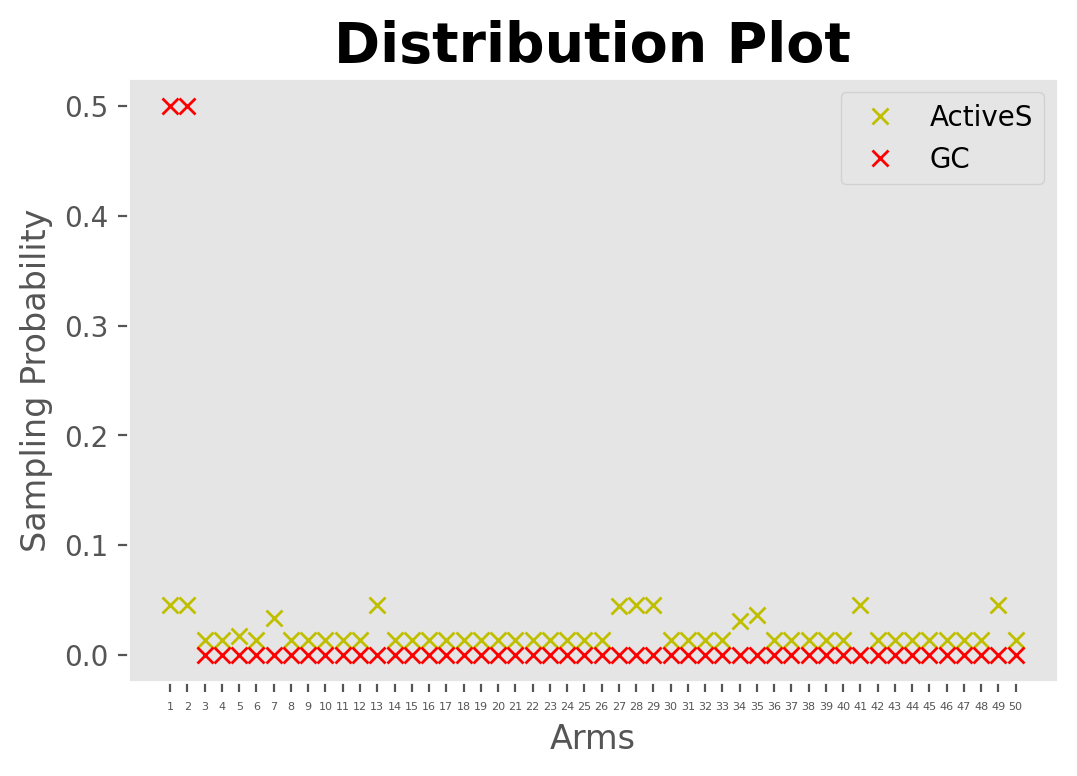

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')

def max_kmin_eig(rows_of_arms, k=1, verbose=False):
        
  p = cp.Variable(rows_of_arms.shape[0], nonneg=True)
        
  prob = cp.Problem(cp.Maximize(cp.lambda_sum_smallest(rows_of_arms.T @ cp.diag(p) @ rows_of_arms, k)),[cp.sum(p) ==1])
        
  try:
    obj_value = prob.solve(solver='CVXOPT', kktsolver=cp.ROBUST_KKTSOLVER, verbose=verbose)
  except Exception as inst:
    print(inst)
    return False
        
  return p.value, prob.value

p_cher, v_cher = max_kmin_eig(env.X, verbose=False)
print(p_cher)



## ActiveSet Optimization

#theta1 = np.array([1.0,0.0]).T
theta1 = np.array(env.theta_star).T
#theta1 = np.array([30.12501315, 0.84483708]).T
m2 = 10
p_unif = [1.0/env.num_arms for i in range(0,env.num_arms)]

def solve_optimization(theta1):

      
      d = env.num_dims
      #self.m2 = 100

      
      X_sampled = np.copy(env.X)

      X_sampled = X_sampled.T
      # print(np.shape(X_sampled))
      # print("X: ",X_sampled)

      IU_theta1 = np.zeros((d, d))
      #for i in range(self.m2):
      for i in range(env.num_arms):
        ext = np.exp( np.matmul(X_sampled[:, i:i+1].T, theta1))
        val = ext /((1.0 + ext)**2) * np.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T)
        IU_theta1 = IU_theta1 + val
        #print('val', val)

      
      #print('IU_theta1', IU_theta1)

      u, e, v = np.linalg.svd(IU_theta1)
      #print('u e v', u.shape, e.shape, v.shape)
      e = e.reshape(-1, 1)

      # print('e', e.shape)
      # print("e", e.T, e)

      #e = np.array([[2.35976768], [1.26244748]])
      # print("e", e.T, e)

      a = cp.Variable((env.num_arms, 1))
      c = cp.Variable((d, 1))

      # a = cp.Variable(m2)
      # c = cp.Variable(d)

      S = np.zeros((d, d))
      #for i in range(self.m2):
      for i in range(env.num_arms):
        ext = np.exp( np.matmul(X_sampled[:, i:i+1].T, theta1))
        S = S + a[i, 0] * ext /((1.0 + ext)**2) * cp.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T)

      # print('S.shape', S.shape)
      # print(np.shape(a))
      # print(np.shape(c))
      
      constraints = [a >= 0]
      constraints += [a <= 1]
      constraints += [cp.sum(a) == m2]

      for j in range(d):
        constraints += [cp.matrix_frac(v[:, j], S) <= c[j, 0]]

      # for j in range(len(constraints)):
      #   print(constraints[j])

      prob = cp.Problem(cp.Minimize(e.T @ c), constraints)

      prob.solve()

      # print("The optimal value is", prob.value)
      # print("A solution X is")
      # print(a.value)

      return a.value


a_star = solve_optimization(theta1)
alpha = 1 - (np.power(m2, -1.0/6.0))
            
#print(a_star, np.shape(a_star))
gamma1 = a_star/m2


gamma_bar = np.zeros(env.num_arms)

# Calculate distribution, 

for k in range(env.num_arms):
      
  gamma_bar[k] += alpha*(gamma1[k]) + (1.0 - alpha)*p_unif[k]

gamma_bar = gamma_bar/np.sum(gamma_bar)


print("2nd stage, dist: ", gamma_bar)


## Plot Distribution

#plt.style.use('seaborn-muted')
plt.style.use('ggplot')
plt.figure(dpi=200)


plt.title('Distribution Plot', size = 20, fontweight='bold')

scale = [i+1 for i in range(len(gamma_bar))]

plt.plot(scale, gamma_bar, color = "y", marker='x', linewidth = 0.0, label='ActiveS')
plt.plot(scale, p_cher, color = "r", marker='x', linewidth = 0.0, label='GC')

# 

# plt.scatter(gamma_bar, scale, color = "y", linewidth = 1.0, label='ActiveS')
# plt.scatter(p_cher, scale, color = "r", linewidth = 1.0, label='GC')

plt.xticks(scale, size = 4)
plt.yticks(size = 10)
plt.ylabel('Sampling Probability')
plt.xlabel('Arms')


plt.legend()
plt.grid()
plt.show()




# GSy

In [ ]:
from scipy import ndimage

a = np.array(([0,0,0,0],
                  [0,1,1,0],
                  [0,1,1,0],
                  [0,1,1,0]))
print(ndimage.measurements.center_of_mass(a))


(2.0, 1.5)


In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp
from scipy.optimize import least_squares

#from environment.LinBandit_env import LinBandit_env

class GSY_Sampling(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = env.T
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        self.sample_complexity = []
        self.sigma = env.sigma
        
        self.theta_star = env.theta_star
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env
        
        self.esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.armerr = np.zeros((self.num_trials, self.T//self.rec))
        # self.mm_T = self.T * np.ones(self.num_trials)
        
        self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)
        # self.p_mm = [1.0/self.num_arms for i in range(self.num_arms)]
        
    
        
    def max_kmin_eig(self, rows_of_arms, k=1, verbose=False):
        
        p = cp.Variable(rows_of_arms.shape[0], nonneg=True)
        
        prob = cp.Problem(
            cp.Maximize(cp.lambda_sum_smallest(rows_of_arms.T @ cp.diag(p) @ rows_of_arms, k)),
            [cp.sum(p) ==1]
        )
        
        try:
            obj_value = prob.solve(solver='CVXOPT', kktsolver=cp.ROBUST_KKTSOLVER, verbose=verbose)
        except Exception as inst:
            print(inst)
            return False
        
        return p.value, prob.value
    
    
      

    def residuals(self, theta):
      '''
      function to be optimized
      '''
      


      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      #rand_start = np.array([0.6, 0.6, 0.6])
      rand_start = np.random.randn(self.env.num_dims)
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln
    
    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      #print(x_coord)
      #print(theta, X)
      # print(np.transpose(theta, x))
      mu_list = []
      for x in X:
        mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
      
      return np.array(mu_list)
      #return 1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x[0]))))
      #return np.array([0, 1, 0])
    
    def run_GSY_Sampling(self):

        self.error = np.zeros((self.num_trials, self.T))  

        for tr in range(self.num_trials):

            self.seed = tr 
            np.random.seed(tr)
            print(tr, end=' ')
            
            
            A = np.eye(self.num_dims)
            b = np.zeros(self.num_dims)
            #print(p_mm,v, num_arms, num_samples)
            np.random.seed(tr)
            
            samples = []
            R = []
           
            rewards = np.zeros((2, self.num_arms))
            err = np.zeros((2, self.T//self.rec))

            #self.p_mm = [1.0/self.num_arms for i in range(0,self.num_arms)]
            self.inds_pulled = []
            self.rewards = []

            self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)


            self.inds_pulled = []
            self.rewards = []
            for s in range(0, self.T):
                
                arm = np.random.choice(self.num_arms, size = 1, p = self.p_mm)
                # print(arm)
                reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()
                # reward = np.dot(self.X[arm], self.theta_star) + self.sigma * np.random.randn()
                # reward = self.env.Y[arm[0]]

                self.inds_pulled.append(arm[0])
                self.rewards.append(reward[0])
                # print(arm, reward)
                samples.append(arm[0])
                R.append(reward[0])

                rewards[0, samples[s]] += R[s]
                rewards[1, samples[s]] += 1
                A += np.outer(self.X[samples[s]], self.X[samples[s]])
                b += R[s] * self.X[samples[s]]
        
                
                
                if s%30 == 0:
                  theta_hat = self.find_least_square()["x"]

                

                err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                #maxmin_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                    
                if s%100 == 0 and s >= 100:
                  print(s, theta_hat, self.theta_star, err[0][s])

                if s%1000 == 0:
                    print(s)
                    
            self.esterr[tr] = err[0]
            self.armerr[tr] = err[1]
            self.sample_complexity.append(samples)



if __name__ == "__main__":
    

    
    gsy = GSY_Sampling(env)
    # print(gsy.p_mm)
    gsy.run_GSY_Sampling()




0 0
100 [0.75276968 0.23856606] [ 1.00292893 -0.00707107] 0.35059556176728796
200 [0.86223765 0.10460542] [ 1.00292893 -0.00707107] 0.1796264848907826
300 [0.77164542 0.04992498] [ 1.00292893 -0.00707107] 0.23820287727769235
400 [ 0.76294847 -0.00191204] [ 1.00292893 -0.00707107] 0.24003590594048574
500 [ 0.8011726  -0.01530835] [ 1.00292893 -0.00707107] 0.20192442004204902
600 [ 0.85346832 -0.03542607] [ 1.00292893 -0.00707107] 0.1521265286975725
700 [ 0.90742266 -0.02298806] [ 1.00292893 -0.00707107] 0.0968235390560392
800 [ 0.87936328 -0.04116477] [ 1.00292893 -0.00707107] 0.12818287935792705
900 [ 0.88627344 -0.03967446] [ 1.00292893 -0.00707107] 0.1211259037076816
1000 [ 0.92944892 -0.01998219] [ 1.00292893 -0.00707107] 0.07460569027704012
1000
1100 [9.43766233e-01 6.49074601e-04] [ 1.00292893 -0.00707107] 0.05966427361753631
1200 [0.897171   0.00469463] [ 1.00292893 -0.00707107] 0.10641038985522777
1300 [0.89680146 0.00397748] [ 1.00292893 -0.00707107] 0.10670103646684657


KeyboardInterrupt: ignored

# Active and Adaptive Sequential Learning

In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp
from scipy.optimize import least_squares

#from environment.LinBandit_env import LinBandit_env

class GLM_AASL(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = env.T
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        
        self.sigma = env.sigma
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env
        
        self.AASL_esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.AASL_armerr = np.zeros((self.num_trials, self.T//self.rec))
        self.AASL_T = self.T * np.ones(self.num_trials)

        self.AASL_sample_complexity = []
        
        self.p_unif = [1.0/self.num_arms for i in range(0,self.num_arms)]
        
    
    def init_GLM_Unif_Sampling(self, env):   
        
        self.theta_star = env.theta_star
        self.best_arm = env.best_arm
        self.X = env.X
        self.p_unif = [1.0/self.num_arms for i in range(0,self.num_arms)]
        #self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=True)
        
        #print(delta)
        
    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      
      mu_list = []
      for x in X:
        mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
      
      return np.array(mu_list)
      

    def residuals(self, theta):
      '''
      function to be optimized
      '''
      

      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      
      rand_start = np.array([0.6, 0.6])
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln

    
    def solve_optimization(self, theta1):

      
      d = self.num_dims

      
      X_sampled = np.zeros((self.m2, d))

      for i in range(self.m2):
        #vec = np.random.randn(2)
        vec = self.X[self.inds_pulled[i]]
        X_sampled[i,:] = vec

      X_sampled = X_sampled.T
      # print(np.shape(X_sampled))
      # print("X: ",X_sampled)

      IU_theta1 = np.zeros((d, d))
      for i in range(self.m2):
        ext = np.exp( np.matmul(X_sampled[:, i:i+1].T, theta1))
        val = ext /((1.0 + ext)**2) * np.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T)
        IU_theta1 = IU_theta1 + val
        #print('val', val)

      # IU_theta1 += 0.01*np.eye(d) # Adding a \lambda I

      

      #print('IU_theta1', IU_theta1)

      u, e, v = np.linalg.svd(IU_theta1)
      #print('u e v', u.shape, e.shape, v.shape)
      e = e.reshape(-1, 1)

      # print('e', e.shape)
      # print("e", e.T, e)

      #e = np.array([[2.35976768], [1.26244748]])
      # print("e", e.T, e)

      a = cp.Variable((self.m2, 1))
      c = cp.Variable((d, 1))

      # a = cp.Variable(m2)
      # c = cp.Variable(d)

      S = np.zeros((d, d))
      for i in range(self.m2):
        ext = np.exp( np.matmul(X_sampled[:, i:i+1].T, theta1))
        S = S + a[i, 0] * ext /((1.0 + ext)**2) * cp.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T)

      # print('S.shape', S.shape)
      # print(np.shape(a))
      # print(np.shape(c))
      
      constraints = [a >= 0]
      constraints += [a <= 1]
      constraints += [cp.sum(a) == self.m2]

      for j in range(d):
        constraints += [cp.matrix_frac(v[:, j], S) <= c[j, 0]]

      # for j in range(len(constraints)):
      #   print(constraints[j])

      prob = cp.Problem(cp.Minimize(e.T @ c), constraints)

      prob.solve()

      # print("The optimal value is", prob.value)
      # print("A solution X is")
      # print(a.value)

      return a.value

    def get_distribution(self, s, theta_hat):

      # len m2 <= s
      self.m2 = s
      a_star = self.solve_optimization(theta_hat)
      alpha = 1 - (np.power((s + 1), -1.0/2.0))

      # print(alpha, np.shape(a_star))
      gamma1 = a_star/self.m2

      # print(gamma1, np.shape(gamma1))
      # print("sum: ", gamma1[0,:], np.sum(gamma1[0,:]))

      gamma_bar = np.zeros(self.num_arms)

      # Calculate distribution, len(self.inds_pulled) == m1 == m2

      for k in range(self.num_arms):

          for j in range(len(self.inds_pulled)):

            if self.inds_pulled[j] == k:
                  
              gamma_bar[k] += alpha*(gamma1[j]) + (1.0 - alpha)*self.p_unif[k]

      gamma_bar = gamma_bar/np.sum(gamma_bar)

      return gamma_bar

    def run_GLM_AASL(self):

        self.error = np.zeros((self.num_trials, self.T))  
        
        
        for tr in range(self.num_trials):
            print(tr, end=' ')
            self.seed = tr 
            np.random.seed(tr)
            
            '''
            env = self.env.LinBandit_env1(tr, self.num_dims, self.num_arms)
            self.init_MaxMin_Sampling(env)
            '''
            AASL_A = np.eye(self.num_dims)
            AASL_b = np.zeros(self.num_dims)
            #print(p_mm,v, num_arms, num_samples)
            # np.random.seed(tr)
            # unif_samples = np.random.choice(self.num_arms, size=self.T, p = self.p_unif)
            # unif_R = self.X[unif_samples] @ self.theta_star + self.sigma * np.random.randn(len(unif_samples))

            AASL_samples = []
            AASL_R = []

            AASL_rewards = np.zeros((2, self.num_arms))
            AASL_err = np.zeros((2, self.T//self.rec))

            self.inds_pulled = []
            self.rewards = []

            ## Pull each arm once

            self.m1 = 4*self.num_arms
            
            for s in range(self.m1):
                
                arm = np.random.choice(self.num_arms, size = 1, p = self.p_unif)
                reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()

                self.inds_pulled.append(arm[0])
                self.rewards.append(reward[0])
                #print(arm, reward)
                AASL_samples.append(arm[0])
                AASL_R.append(reward[0])


                AASL_rewards[0, AASL_samples[s]] += AASL_R[s]
                AASL_rewards[1, AASL_samples[s]] += 1
                AASL_A += np.outer(self.X[AASL_samples[s]], self.X[AASL_samples[s]])
                AASL_b += AASL_R[s] * self.X[AASL_samples[s]]
        
                #if s % self.rec == 0 and s > 0:
                # theta_hat = least_sq_theta(maxmin_rewards, X)[0]
                #theta_hat = np.linalg.solve(unif_A, unif_b)
                if s%3 == 0:
                  theta_hat = self.find_least_square()["x"]

                AASL_err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                AASL_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                   
                if s%100 == 0 and s >= 100:
                  print(theta_hat, self.theta_star, AASL_err[0][s])

                if s%1000 == 0:
                    print(s)
            
            

            theta_hat = self.find_least_square()["x"]
            gamma_bar = self.get_distribution(self.m1, theta_hat)

            for s in range(self.m1, self.T):
                
                # Find Distribution
                
                if s%2 == 0 and s < 1200:
                  gamma_bar = self.get_distribution(s, theta_hat)
                
                

                #print("2nd stage, dist: ", gamma_bar)

                arm = np.random.choice(self.num_arms, size = 1, p = gamma_bar)
                reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()

                self.inds_pulled.append(arm[0])
                self.rewards.append(reward[0])
                #print(arm, reward)
                AASL_samples.append(arm[0])
                AASL_R.append(reward[0])


                AASL_rewards[0, AASL_samples[s]] += AASL_R[s]
                AASL_rewards[1, AASL_samples[s]] += 1
                AASL_A += np.outer(self.X[AASL_samples[s]], self.X[AASL_samples[s]])
                AASL_b += AASL_R[s] * self.X[AASL_samples[s]]
        
                #if s % self.rec == 0 and s > 0:
                # theta_hat = least_sq_theta(maxmin_rewards, X)[0]
                #theta_hat = np.linalg.solve(unif_A, unif_b)
                if s%3 == 0:
                  theta_hat = self.find_least_square()["x"]

                AASL_err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                AASL_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                   
                if s%100 == 0 and s >= 100:
                  print(s,theta_hat, self.theta_star, AASL_err[0][s])
                  #print(gamma_bar)

                if s%1000 == 0:
                    print(s)
            

            theta2 = theta_hat
                    
            self.AASL_esterr[tr] = AASL_err[0]
            self.AASL_armerr[tr] = AASL_err[1]
            self.AASL_sample_complexity.append(AASL_samples)



if __name__ == "__main__":
    
    env = LinBandit_env()
    env.LinBandit_env1(16, 2, 50)
    
    glm_AASL = GLM_AASL(env)
    glm_AASL.run_GLM_AASL()




[[1.         0.        ]
 [0.         1.        ]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.64834394 0.76134758]
 [0.7412503  0.67122871]
 [0.80594492 0.59199053]
 [0.6809283  0.73235009]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.78951088 0.61373656]
 [0.70710678 0.70710678]
 [0.58604636 0.81027752]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.751627   0.65958839]
 [0.70710678 0.70710678]
 [0.77594022 0.63080645]
 [0.6725454  0.74005586]
 [0.77351489 0.63377812]
 [0.72583922 0.68786439]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.75469446 0.65607642]
 [0.70028379 0.71386456]
 [0.81404059 0.58080799]
 [0.61725833 0.78676055]
 [0.81588688 0.57821155]
 [0.70710678 0.70710678]
 [0.71836277 0.6956687 ]
 [0.70710678 0.70710678]
 [0.69868259 0.71543178]
 [0.80546877 0.59263822]
 [0.63436953 0.77302995]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70890822 0.70530075]


## Drive Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# File Save

linearAct6 only  contains 

A = glm_gen_chern.error
B = glm_unif.error
C = glm_ogreedy.error
D = glm_emcm.error

In [ ]:
### File saving ####

import pickle
file = open("/content/drive/My Drive/AmFamFiles/linearAct16", 'wb')

A = glm_gen_grad_chern.error
B = glm_unif.error
C = glm_ogreedy.error
D = glm_emcm.error
E = glm_activeS.error
F = gen_chern_e.error

pickle.dump([A, B, C, D, E, F],file) # dump information to that file

file.close() # close the file


# File Load

In [ ]:
import pickle 
file = open("/content/drive/My Drive/AmFamFiles/linearAct16", 'rb')
data = pickle.load(file)
file.close()


glm_gen_grad_chern.error = data[0]
glm_unif.error = data[1]
glm_ogreedy.error = data[2]
glm_emcm.error = data[3]
glm_activeS.error = data[4]
gen_chern_e.error = data[5]

print(np.shape(data[0]))
print(np.shape(data[1]))
#print(gen_chern.error)

(20, 1000)
(20, 1000)


In [ ]:
#np.average(glm_greedy.error[:,:], axis=0)

test2_greedy = np.zeros((env.num_trials, env.T))
for tr in range(0,env.num_trials):
  for i in range(0,env.T):
    test2_greedy[tr][i] = min(glm_greedy.error[tr][i], 70)

print(np.average(glm_greedy.error[:,0:50], axis=0))
print(np.average(test2_greedy[:,0:50], axis=0))

# test1_greedy = np.array(test1_greedy)
# np.average(test1_greedy[:,:], axis=0)

# Plot Error

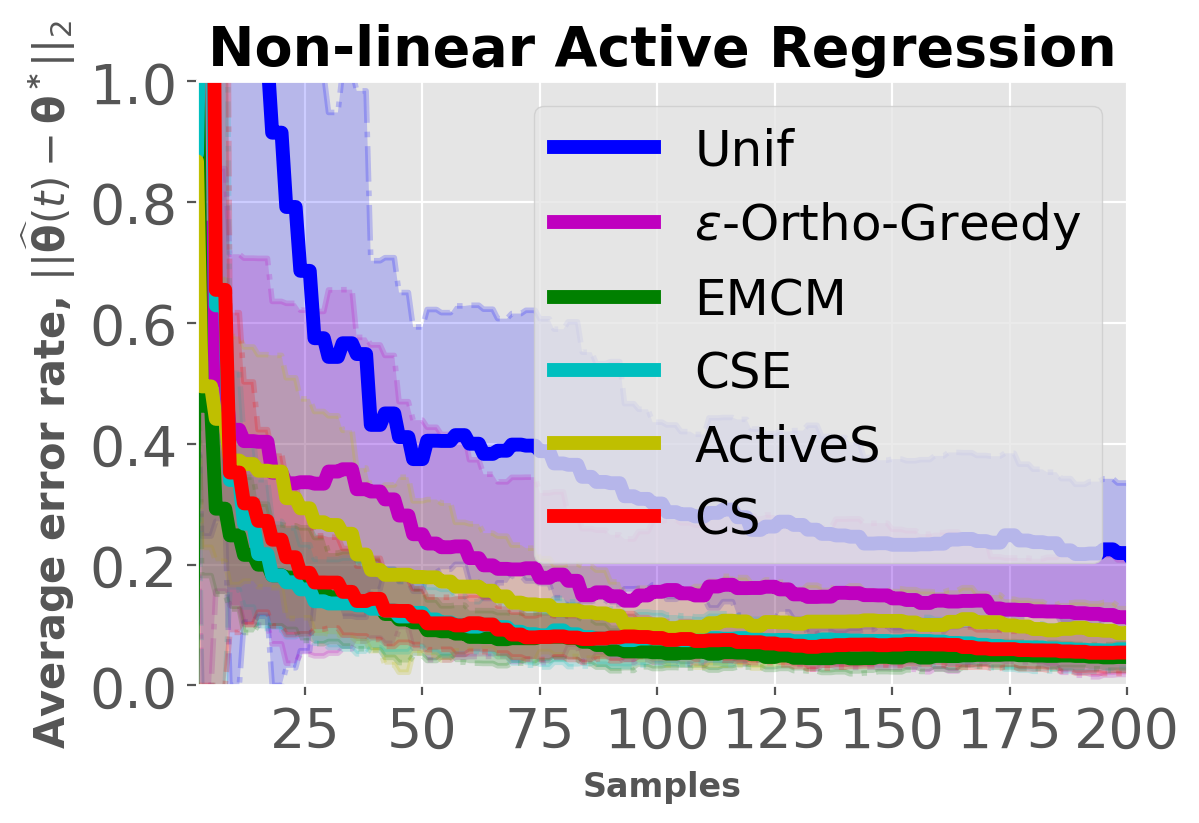

In [ ]:
# plot average errors
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')

#plt.style.use('seaborn-muted')
plt.style.use('ggplot')
plt.figure(dpi=200)


# print(glm_activeS.error, glm_AASL.error)

plt.title('Non-linear Active Regression', size = 20, fontweight='bold')



plt.plot(range(env.T), np.average(glm_unif.error, axis=0), color = "b", linewidth = 5.0, label='Unif')
plt.plot(range(env.T), np.average(glm_ogreedy.error, axis=0), color = "m", linewidth = 5.0, label='$\epsilon$-Ortho-Greedy')
plt.plot(range(env.T), np.average(glm_emcm.error, axis=0), color = "g", linewidth = 5.0, label='EMCM')
plt.plot(range(env.T), np.average(gen_chern_e.error, axis=0), color = "c", linewidth = 5.0, label='CSE')

plt.plot(range(env.T), np.average(glm_activeS.error, axis=0), color = "y", linewidth = 5.0, label='ActiveS')
# plt.plot(range(env.T), np.average(glm_gen_chern.error, axis=0), color = "r", linewidth = 6.0, label='GC')
plt.plot(range(env.T), np.average(glm_gen_grad_chern.error, axis=0), color = "r", linewidth = 5.0, label='CS')

# plt.fill_between(range(env.T), np.average(glm_gen_chern.error, axis=0) + np.std(glm_gen_chern.error, axis=0),np.clip(np.average(glm_gen_chern.error, axis=0) - np.std(glm_gen_chern.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="r", facecolor="r", linewidth=2, linestyle='dashdot', antialiased=True)
plt.fill_between(range(env.T), np.average(glm_unif.error, axis=0) + np.std(glm_unif.error, axis=0),np.clip(np.average(glm_unif.error, axis=0) - np.std(glm_unif.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="b", facecolor="b", linewidth=2, linestyle='dashdot', antialiased=True)
plt.fill_between(range(env.T), np.average(glm_ogreedy.error, axis=0) + np.std(glm_ogreedy.error, axis=0),np.clip(np.average(glm_ogreedy.error, axis=0) - np.std(glm_ogreedy.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="m", facecolor="m", linewidth=2, linestyle='dashdot', antialiased=True)
plt.fill_between(range(env.T), np.average(glm_emcm.error, axis=0) + np.std(glm_emcm.error, axis=0),np.clip(np.average(glm_emcm.error, axis=0) - np.std(glm_emcm.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="g", facecolor="g", linewidth=2, linestyle='dashdot', antialiased=True)

plt.fill_between(range(env.T), np.average(glm_activeS.error, axis=0) + np.std(glm_activeS.error, axis=0),np.clip(np.average(glm_activeS.error, axis=0) - np.std(glm_activeS.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="y", facecolor="y", linewidth=2, linestyle='dashdot', antialiased=True)
plt.fill_between(range(env.T), np.average(gen_chern_e.error, axis=0) + np.std(gen_chern_e.error, axis=0),np.clip(np.average(gen_chern_e.error, axis=0) - np.std(gen_chern_e.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="c", facecolor="c", linewidth=2, linestyle='dashdot', antialiased=True)
plt.fill_between(range(env.T), np.average(glm_gen_grad_chern.error, axis=0) + np.std(glm_gen_grad_chern.error, axis=0),np.clip(np.average(glm_gen_grad_chern.error, axis=0) - np.std(glm_gen_grad_chern.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="r", facecolor="r", linewidth=2, linestyle='dashdot', antialiased=True)





plt.legend(fontsize = 18)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel('Average error rate, $\\|\\|\widehat{\mathbf{\\theta}}(t) - \mathbf{\\theta^*}\\|\\|_2$', fontweight='bold', fontsize = 15)
plt.xlabel('Samples', fontweight='bold')

plt.ylim(0,4)
#plt.grid()

plt.grid(b=True, which='major', linestyle='-')
plt.xlim(2,200)
plt.ylim(0,1)
plt.show()

In [ ]:
error1 = np.copy(glm_emcm.error)
error1[:,0] = 1.0
print(error1)

[[1.         0.         0.86321708 ... 0.02765986 0.02765986 0.02577517]
 [1.         0.         0.8670656  ... 0.01052669 0.01052669 0.01170512]
 [1.         0.         1.4205389  ... 0.01823775 0.01823775 0.0187964 ]
 ...
 [1.         0.         1.98532267 ... 0.03767636 0.03767636 0.03697802]
 [1.         0.         2.38345624 ... 0.01242503 0.01242503 0.01053449]
 [1.         0.         0.85003487 ... 0.0136971  0.0136971  0.01467841]]


# Plot Error 1

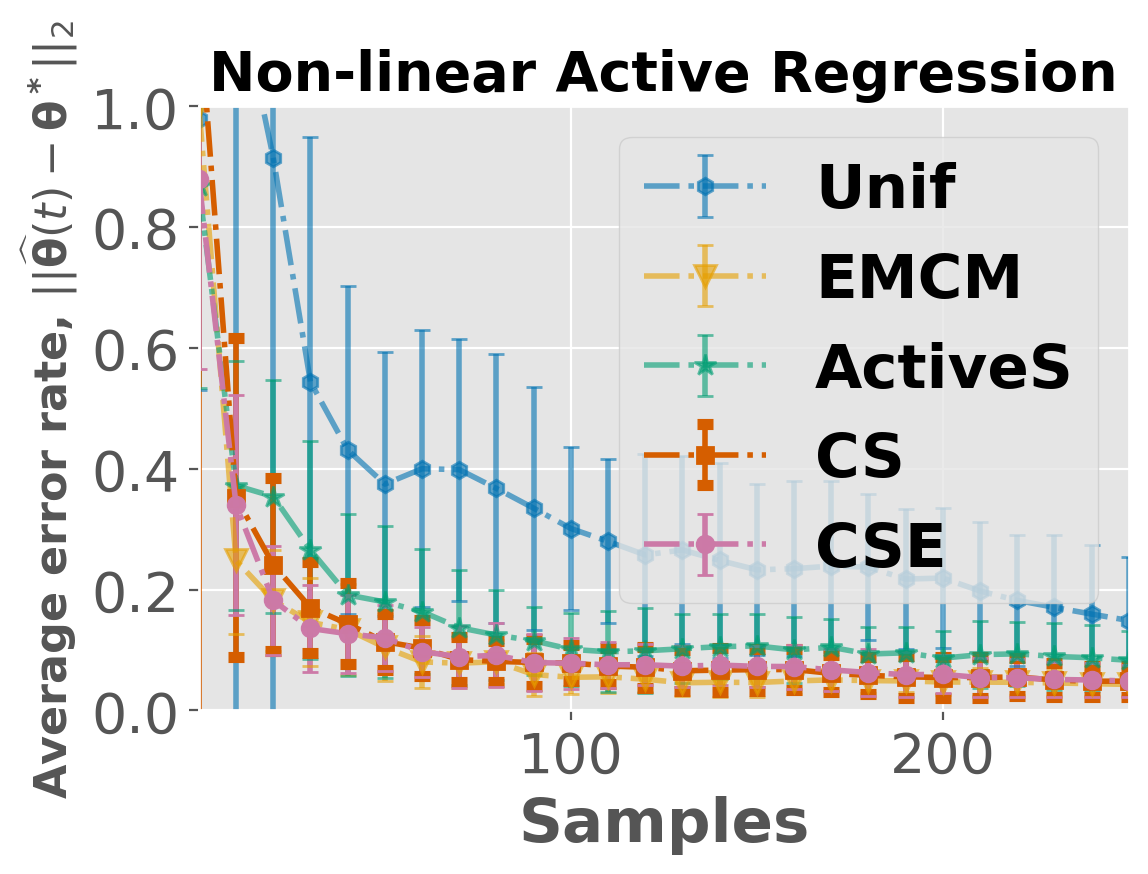

In [ ]:
# plot average errors
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')

#plt.style.use('seaborn-muted')
plt.style.use('ggplot')
plt.figure(dpi=200)


# print(glm_activeS.error, glm_AASL.error)

plt.title('Non-linear Active Regression', size = 20, fontweight='bold')

scale = np.arange(0, env.T, 10)

# plt.plot(range(env.T), np.average(unif.error, axis=0), color = "b", linewidth = 0.0, label='Unif')
# plt.plot(range(env.T), np.average(ogreedy.error, axis=0), color = "m", linewidth = 0.0, label='$\epsilon$-Ortho-Greedy')
# plt.plot(range(env.T), np.average(emcm.error, axis=0), color = "g", linewidth = 0.0, label='EMCM')

# plt.plot(range(env.T), np.average(activeS.error, axis=0), color = "y", linewidth = 0.0, label='ActiveS')
# plt.plot(range(env.T), np.average(gen_chern_e.error, axis=0), color = "c", linewidth = 0.0, label='GCE')
# plt.plot(range(env.T), np.average(gen_chern.error, axis=0), color = "r", linewidth = 0.0, label='GC')

# plt.fill_between(range(env.T), np.average(gen_chern.error, axis=0) + np.std(gen_chern.error, axis=0),np.clip(np.average(gen_chern.error, axis=0) - np.std(gen_chern.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="r", facecolor="r", linewidth=2, linestyle='dashdot', antialiased=True)
# plt.fill_between(range(env.T), np.average(unif.error, axis=0) + np.std(unif.error, axis=0),np.clip(np.average(unif.error, axis=0) - np.std(unif.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="b", facecolor="b", linewidth=2, linestyle='dashdot', antialiased=True)
# plt.fill_between(range(env.T), np.average(ogreedy.error, axis=0) + np.std(ogreedy.error, axis=0),np.clip(np.average(ogreedy.error, axis=0) - np.std(ogreedy.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="m", facecolor="m", linewidth=2, linestyle='dashdot', antialiased=True)
# # plt.fill_between(range(env.T), np.average(emcm.error, axis=0) + np.std(emcm.error, axis=0),np.clip(np.average(emcm.error, axis=0) - np.std(emcm.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="g", facecolor="g", linewidth=2, linestyle='dashdot', antialiased=True)

# plt.fill_between(range(env.T), np.average(activeS.error, axis=0) + np.std(activeS.error, axis=0),np.clip(np.average(activeS.error, axis=0) - np.std(activeS.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="y", facecolor="y", linewidth=2, linestyle='dashdot', antialiased=True)
# plt.fill_between(range(env.T), np.average(gen_chern_e.error, axis=0) + np.std(gen_chern_e.error, axis=0),np.clip(np.average(gen_chern_e.error, axis=0) - np.std(gen_chern_e.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="c", facecolor="c", linewidth=2, linestyle='dashdot', antialiased=True)

# plt.errorbar(range(env.T), np.average(gen_chern_e.error, axis=0) + np.std(gen_chern_e.error, axis=0),np.clip(np.average(gen_chern_e.error, axis=0) - np.std(gen_chern_e.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="c", facecolor="c", linewidth=2, linestyle='dashdot', antialiased=True)



# plt.errorbar(range(env.T), np.average(gen_chern_e.error, axis=0), np.std(gen_chern_e.error, axis=0), linestyle='None', marker='^')


# plt.errorbar(scale, [np.average(glm_unif.error, axis=0)[i] for i in scale], [1.0*np.std(glm_unif.error, axis=0)[i] for i in scale], color = "b", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 0.7, label = "Unif")
# # plt.errorbar(scale, [np.average(glm_ogreedy.error, axis=0)[i] for i in scale], [1.0*np.std(glm_ogreedy.error, axis=0)[i] for i in scale], color = "m", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 0.7, label='$\epsilon$-Ortho-Greedy')
# # plt.errorbar(scale, [np.average(glm_emcm.error, axis=0)[i] for i in scale], [1.0*np.std(glm_emcm.error, axis=0)[i] for i in scale], color = "g", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 0.7, label='EMCM')
# plt.errorbar(scale, [np.average(glm_activeS.error, axis=0)[i] for i in scale], [1.0*np.std(glm_activeS.error, axis=0)[i] for i in scale], color = "y", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 0.7, label='ActiveS')
# plt.errorbar(scale, [np.average(glm_gen_grad_chern.error, axis=0)[i] for i in scale], [1.0*np.std(glm_gen_grad_chern.error, axis=0)[i] for i in scale], color = "r", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 1.0, label='CS')
# plt.errorbar(scale, [np.average(gen_chern_e.error, axis=0)[i] for i in scale], [1.0*np.std(gen_chern_e.error, axis=0)[i] for i in scale], color = "c", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 1.0, label='CSE', solid_joinstyle = "bevel")

plt.errorbar(scale, [np.average(glm_unif.error, axis=0)[i] for i in scale], [1.0*np.std(glm_unif.error, axis=0)[i] for i in scale], color = "#0072B2", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 0.6, label = "Unif", linestyle = "-.", marker = "h", markersize = 6.0)
# plt.errorbar(scale, [np.average(glm_ogreedy.error, axis=0)[i] for i in scale], [1.0*np.std(glm_ogreedy.error, axis=0)[i] for i in scale], color = "#E69F00", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 0.6, label='$\epsilon$-Ortho-Greedy')
plt.errorbar(scale, [np.average(error1, axis=0)[i] for i in scale], [1.0*np.std(error1, axis=0)[i] for i in scale], color = "#E69F00", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 0.6, label='EMCM', linestyle = "-.", marker = "v", markersize = 8.0)
plt.errorbar(scale, [np.average(glm_activeS.error, axis=0)[i] for i in scale], [1.0*np.std(glm_activeS.error, axis=0)[i] for i in scale], color = "#009E73", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 0.6, label='ActiveS', linestyle = "-.", marker = "*", markersize = 8.0)
plt.errorbar(scale, [np.average(glm_gen_grad_chern.error, axis=0)[i] for i in scale], [1.0*np.std(glm_gen_grad_chern.error, axis=0)[i] for i in scale], color = "#D55E00", linewidth = 2, capsize = 3.0, capthick = 4.0, alpha = 1.0, label='CS', linestyle = "-.", marker = "s", markersize = 6.0)
plt.errorbar(scale, [np.average(gen_chern_e.error, axis=0)[i] for i in scale], [1.0*np.std(gen_chern_e.error, axis=0)[i] for i in scale], color = "#CC79A7", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 4.0, label='CSE', linestyle = "-.", marker = "o", markersize = 6.0)


legend_properties = {'weight':'bold', 'size':22}
plt.legend(prop = legend_properties)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel('Average error rate, $\\|\\|\widehat{\mathbf{\\theta}}(t) - \mathbf{\\theta^*}\\|\\|_2$', fontweight='bold', fontsize = 16)
plt.xlabel('Samples', fontweight='bold', fontsize = 22)

plt.ylim(0,1)
#plt.grid()
plt.grid(b=True, which='major', linestyle='-')
# plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
x_ticks = np.arange(100, env.T, 100)
plt.xticks(x_ticks)
plt.xlim(0,250)
plt.show()